## TRAIN AND VALIDATION

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, scheduler, num_epochs, stats_interval, fig_name, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, scheduler, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
#     ax_1.legend(loc=0)
    ax_1.grid('on') # Turn axes grid on
    ax_1.legend(loc='best', fontsize=11) # Add a legend
    ax_1.set_xlabel('Epoch number')

    fig_1.tight_layout() # This minimises whitespace around the axes.
    fig_1.savefig('err_' + fig_name) # Save figure to current directory in PDF format
    
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
#     ax_2.legend(loc=0)
    ax_2.grid('on') # Turn axes grid on
    ax_2.legend(loc='best', fontsize=11) # Add a legend
    ax_2.set_xlabel('Epoch number')
    
    fig_2.tight_layout() # This minimises whitespace around the axes.
    fig_2.savefig('acc_' + fig_name) # Save figure to current directory in PDF format
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

## TRAIN AND TEST

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def test_model(model, error, learning_rule, train_data, test_data, scheduler, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, test_data, scheduler, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    
    return stats, keys, run_time

In [18]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
from itertools import product
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

In [19]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, RMSPropLearningRule, GradientDescentLearningRule, AdaGradLearningRule, AdamLearningRuleWithWeightDecay
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts
from mlp.penalties import L2Penalty

### batch_size = 100

In [20]:
# Set batch size
batch_size = 100

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x12ccdac18>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x110688780>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x12ccdac18>)


# TRAIN AND VALIDATING

## Adam Weight Decay

--------------------------------------------------------------------------------
weight_decay=1.00e-05
--------------------------------------------------------------------------------


Epoch 1: 8.0s to complete
    error(train)=2.96e+00, acc(train)=3.17e-01, error(valid)=2.96e+00, acc(valid)=3.14e-01


Epoch 2: 7.6s to complete
    error(train)=2.26e+00, acc(train)=4.47e-01, error(valid)=2.26e+00, acc(valid)=4.44e-01


Epoch 3: 10.1s to complete
    error(train)=1.93e+00, acc(train)=5.07e-01, error(valid)=1.93e+00, acc(valid)=5.08e-01


Epoch 4: 10.7s to complete
    error(train)=1.74e+00, acc(train)=5.45e-01, error(valid)=1.74e+00, acc(valid)=5.42e-01


Epoch 5: 10.4s to complete
    error(train)=1.62e+00, acc(train)=5.72e-01, error(valid)=1.62e+00, acc(valid)=5.68e-01


Epoch 6: 14.3s to complete
    error(train)=1.54e+00, acc(train)=5.90e-01, error(valid)=1.54e+00, acc(valid)=5.88e-01


Epoch 7: 10.1s to complete
    error(train)=1.47e+00, acc(train)=6.05e-01, error(valid)=1.47e+00, acc(valid)=6.00e-01


Epoch 8: 9.1s to complete
    error(train)=1.42e+00, acc(train)=6.17e-01, error(valid)=1.42e+00, acc(valid)=6.13e-01


Epoch 9: 7.9s to complete
    error(train)=1.38e+00, acc(train)=6.27e-01, error(valid)=1.38e+00, acc(valid)=6.22e-01


Epoch 10: 8.1s to complete
    error(train)=1.34e+00, acc(train)=6.34e-01, error(valid)=1.34e+00, acc(valid)=6.27e-01


Epoch 11: 8.1s to complete
    error(train)=1.31e+00, acc(train)=6.41e-01, error(valid)=1.32e+00, acc(valid)=6.36e-01


Epoch 12: 7.8s to complete
    error(train)=1.28e+00, acc(train)=6.46e-01, error(valid)=1.29e+00, acc(valid)=6.39e-01


Epoch 13: 8.1s to complete
    error(train)=1.26e+00, acc(train)=6.54e-01, error(valid)=1.27e+00, acc(valid)=6.47e-01


Epoch 14: 12.8s to complete
    error(train)=1.24e+00, acc(train)=6.59e-01, error(valid)=1.25e+00, acc(valid)=6.52e-01


Epoch 15: 9.2s to complete
    error(train)=1.22e+00, acc(train)=6.63e-01, error(valid)=1.23e+00, acc(valid)=6.58e-01


Epoch 16: 7.4s to complete
    error(train)=1.20e+00, acc(train)=6.67e-01, error(valid)=1.21e+00, acc(valid)=6.62e-01


Epoch 17: 6.6s to complete
    error(train)=1.19e+00, acc(train)=6.71e-01, error(valid)=1.20e+00, acc(valid)=6.67e-01


Epoch 18: 6.0s to complete
    error(train)=1.17e+00, acc(train)=6.75e-01, error(valid)=1.18e+00, acc(valid)=6.70e-01


Epoch 19: 6.1s to complete
    error(train)=1.16e+00, acc(train)=6.80e-01, error(valid)=1.17e+00, acc(valid)=6.76e-01


Epoch 20: 6.6s to complete
    error(train)=1.15e+00, acc(train)=6.83e-01, error(valid)=1.15e+00, acc(valid)=6.77e-01


Epoch 21: 6.9s to complete
    error(train)=1.13e+00, acc(train)=6.86e-01, error(valid)=1.14e+00, acc(valid)=6.81e-01


Epoch 22: 7.0s to complete
    error(train)=1.12e+00, acc(train)=6.90e-01, error(valid)=1.13e+00, acc(valid)=6.84e-01


Epoch 23: 5.9s to complete
    error(train)=1.11e+00, acc(train)=6.93e-01, error(valid)=1.12e+00, acc(valid)=6.88e-01


Epoch 24: 6.0s to complete
    error(train)=1.10e+00, acc(train)=6.96e-01, error(valid)=1.11e+00, acc(valid)=6.91e-01


Epoch 25: 6.0s to complete
    error(train)=1.09e+00, acc(train)=6.98e-01, error(valid)=1.10e+00, acc(valid)=6.94e-01


Epoch 26: 6.1s to complete
    error(train)=1.08e+00, acc(train)=7.02e-01, error(valid)=1.09e+00, acc(valid)=6.97e-01


Epoch 27: 5.9s to complete
    error(train)=1.07e+00, acc(train)=7.04e-01, error(valid)=1.08e+00, acc(valid)=6.98e-01


Epoch 28: 5.9s to complete
    error(train)=1.06e+00, acc(train)=7.05e-01, error(valid)=1.07e+00, acc(valid)=7.01e-01


Epoch 29: 8.8s to complete
    error(train)=1.05e+00, acc(train)=7.08e-01, error(valid)=1.06e+00, acc(valid)=7.04e-01


Epoch 30: 6.3s to complete
    error(train)=1.04e+00, acc(train)=7.10e-01, error(valid)=1.05e+00, acc(valid)=7.05e-01


Epoch 31: 10.3s to complete
    error(train)=1.04e+00, acc(train)=7.11e-01, error(valid)=1.04e+00, acc(valid)=7.07e-01


Epoch 32: 10.3s to complete
    error(train)=1.03e+00, acc(train)=7.14e-01, error(valid)=1.04e+00, acc(valid)=7.09e-01


Epoch 33: 9.9s to complete
    error(train)=1.02e+00, acc(train)=7.16e-01, error(valid)=1.03e+00, acc(valid)=7.13e-01


Epoch 34: 9.0s to complete
    error(train)=1.01e+00, acc(train)=7.17e-01, error(valid)=1.02e+00, acc(valid)=7.14e-01


Epoch 35: 9.1s to complete
    error(train)=1.01e+00, acc(train)=7.18e-01, error(valid)=1.01e+00, acc(valid)=7.15e-01


Epoch 36: 9.2s to complete
    error(train)=9.99e-01, acc(train)=7.21e-01, error(valid)=1.01e+00, acc(valid)=7.17e-01


Epoch 37: 9.0s to complete
    error(train)=9.92e-01, acc(train)=7.22e-01, error(valid)=1.00e+00, acc(valid)=7.18e-01


Epoch 38: 9.1s to complete
    error(train)=9.86e-01, acc(train)=7.25e-01, error(valid)=9.96e-01, acc(valid)=7.20e-01


Epoch 39: 10.2s to complete
    error(train)=9.80e-01, acc(train)=7.26e-01, error(valid)=9.89e-01, acc(valid)=7.22e-01


Epoch 40: 12.2s to complete
    error(train)=9.74e-01, acc(train)=7.27e-01, error(valid)=9.83e-01, acc(valid)=7.24e-01


Epoch 41: 8.9s to complete
    error(train)=9.68e-01, acc(train)=7.28e-01, error(valid)=9.77e-01, acc(valid)=7.25e-01


Epoch 42: 8.5s to complete
    error(train)=9.62e-01, acc(train)=7.30e-01, error(valid)=9.72e-01, acc(valid)=7.28e-01


Epoch 43: 8.8s to complete
    error(train)=9.56e-01, acc(train)=7.31e-01, error(valid)=9.66e-01, acc(valid)=7.29e-01


Epoch 44: 8.0s to complete
    error(train)=9.51e-01, acc(train)=7.33e-01, error(valid)=9.61e-01, acc(valid)=7.30e-01


Epoch 45: 7.0s to complete
    error(train)=9.46e-01, acc(train)=7.34e-01, error(valid)=9.56e-01, acc(valid)=7.30e-01


Epoch 46: 7.4s to complete
    error(train)=9.41e-01, acc(train)=7.35e-01, error(valid)=9.51e-01, acc(valid)=7.34e-01


Epoch 47: 7.1s to complete
    error(train)=9.37e-01, acc(train)=7.36e-01, error(valid)=9.47e-01, acc(valid)=7.34e-01


Epoch 48: 7.0s to complete
    error(train)=9.32e-01, acc(train)=7.38e-01, error(valid)=9.42e-01, acc(valid)=7.35e-01


Epoch 49: 10.3s to complete
    error(train)=9.28e-01, acc(train)=7.38e-01, error(valid)=9.37e-01, acc(valid)=7.36e-01


Epoch 50: 10.4s to complete
    error(train)=9.24e-01, acc(train)=7.40e-01, error(valid)=9.34e-01, acc(valid)=7.36e-01


Epoch 51: 10.0s to complete
    error(train)=9.20e-01, acc(train)=7.41e-01, error(valid)=9.29e-01, acc(valid)=7.37e-01


Epoch 52: 11.5s to complete
    error(train)=9.16e-01, acc(train)=7.41e-01, error(valid)=9.26e-01, acc(valid)=7.37e-01


Epoch 53: 9.0s to complete
    error(train)=9.11e-01, acc(train)=7.42e-01, error(valid)=9.21e-01, acc(valid)=7.40e-01


Epoch 54: 8.4s to complete
    error(train)=9.08e-01, acc(train)=7.44e-01, error(valid)=9.18e-01, acc(valid)=7.42e-01


Epoch 55: 9.1s to complete
    error(train)=9.04e-01, acc(train)=7.45e-01, error(valid)=9.15e-01, acc(valid)=7.40e-01


Epoch 56: 9.9s to complete
    error(train)=9.00e-01, acc(train)=7.46e-01, error(valid)=9.11e-01, acc(valid)=7.43e-01


Epoch 57: 7.0s to complete
    error(train)=8.96e-01, acc(train)=7.46e-01, error(valid)=9.07e-01, acc(valid)=7.43e-01


Epoch 58: 6.8s to complete
    error(train)=8.94e-01, acc(train)=7.48e-01, error(valid)=9.04e-01, acc(valid)=7.44e-01


Epoch 59: 6.9s to complete
    error(train)=8.90e-01, acc(train)=7.48e-01, error(valid)=9.00e-01, acc(valid)=7.44e-01


Epoch 60: 9.3s to complete
    error(train)=8.87e-01, acc(train)=7.49e-01, error(valid)=8.98e-01, acc(valid)=7.47e-01


Epoch 61: 9.9s to complete
    error(train)=8.84e-01, acc(train)=7.50e-01, error(valid)=8.94e-01, acc(valid)=7.47e-01


Epoch 62: 7.4s to complete
    error(train)=8.81e-01, acc(train)=7.51e-01, error(valid)=8.91e-01, acc(valid)=7.47e-01


Epoch 63: 10.7s to complete
    error(train)=8.79e-01, acc(train)=7.51e-01, error(valid)=8.89e-01, acc(valid)=7.48e-01


Epoch 64: 8.8s to complete
    error(train)=8.75e-01, acc(train)=7.52e-01, error(valid)=8.85e-01, acc(valid)=7.49e-01


Epoch 65: 8.1s to complete
    error(train)=8.73e-01, acc(train)=7.52e-01, error(valid)=8.84e-01, acc(valid)=7.50e-01


Epoch 66: 8.5s to complete
    error(train)=8.69e-01, acc(train)=7.54e-01, error(valid)=8.80e-01, acc(valid)=7.50e-01


Epoch 67: 8.6s to complete
    error(train)=8.67e-01, acc(train)=7.53e-01, error(valid)=8.78e-01, acc(valid)=7.49e-01


Epoch 68: 7.9s to complete
    error(train)=8.64e-01, acc(train)=7.55e-01, error(valid)=8.75e-01, acc(valid)=7.52e-01


Epoch 69: 8.1s to complete
    error(train)=8.62e-01, acc(train)=7.55e-01, error(valid)=8.73e-01, acc(valid)=7.52e-01


Epoch 70: 8.3s to complete
    error(train)=8.60e-01, acc(train)=7.55e-01, error(valid)=8.71e-01, acc(valid)=7.52e-01


Epoch 71: 8.5s to complete
    error(train)=8.57e-01, acc(train)=7.56e-01, error(valid)=8.67e-01, acc(valid)=7.53e-01


Epoch 72: 11.7s to complete
    error(train)=8.55e-01, acc(train)=7.58e-01, error(valid)=8.65e-01, acc(valid)=7.53e-01


Epoch 73: 8.3s to complete
    error(train)=8.52e-01, acc(train)=7.57e-01, error(valid)=8.63e-01, acc(valid)=7.53e-01


Epoch 74: 8.8s to complete
    error(train)=8.51e-01, acc(train)=7.58e-01, error(valid)=8.62e-01, acc(valid)=7.54e-01


Epoch 75: 8.0s to complete
    error(train)=8.48e-01, acc(train)=7.58e-01, error(valid)=8.59e-01, acc(valid)=7.53e-01


Epoch 76: 8.1s to complete
    error(train)=8.46e-01, acc(train)=7.59e-01, error(valid)=8.57e-01, acc(valid)=7.54e-01


Epoch 77: 7.1s to complete
    error(train)=8.44e-01, acc(train)=7.60e-01, error(valid)=8.54e-01, acc(valid)=7.57e-01


Epoch 78: 8.3s to complete
    error(train)=8.42e-01, acc(train)=7.61e-01, error(valid)=8.52e-01, acc(valid)=7.57e-01


Epoch 79: 11.4s to complete
    error(train)=8.40e-01, acc(train)=7.60e-01, error(valid)=8.51e-01, acc(valid)=7.58e-01


Epoch 80: 12.7s to complete
    error(train)=8.38e-01, acc(train)=7.61e-01, error(valid)=8.48e-01, acc(valid)=7.56e-01


Epoch 81: 8.6s to complete
    error(train)=8.36e-01, acc(train)=7.62e-01, error(valid)=8.46e-01, acc(valid)=7.57e-01


Epoch 82: 7.9s to complete
    error(train)=8.35e-01, acc(train)=7.62e-01, error(valid)=8.46e-01, acc(valid)=7.58e-01


Epoch 83: 8.2s to complete
    error(train)=8.33e-01, acc(train)=7.62e-01, error(valid)=8.43e-01, acc(valid)=7.58e-01


Epoch 84: 7.5s to complete
    error(train)=8.30e-01, acc(train)=7.63e-01, error(valid)=8.41e-01, acc(valid)=7.60e-01


Epoch 85: 8.3s to complete
    error(train)=8.29e-01, acc(train)=7.64e-01, error(valid)=8.40e-01, acc(valid)=7.59e-01


Epoch 86: 8.8s to complete
    error(train)=8.27e-01, acc(train)=7.64e-01, error(valid)=8.38e-01, acc(valid)=7.60e-01


Epoch 87: 7.9s to complete
    error(train)=8.26e-01, acc(train)=7.65e-01, error(valid)=8.36e-01, acc(valid)=7.61e-01


Epoch 88: 7.9s to complete
    error(train)=8.23e-01, acc(train)=7.65e-01, error(valid)=8.34e-01, acc(valid)=7.60e-01


Epoch 89: 8.7s to complete
    error(train)=8.22e-01, acc(train)=7.65e-01, error(valid)=8.33e-01, acc(valid)=7.62e-01


Epoch 90: 8.2s to complete
    error(train)=8.21e-01, acc(train)=7.65e-01, error(valid)=8.31e-01, acc(valid)=7.62e-01


Epoch 91: 7.4s to complete
    error(train)=8.19e-01, acc(train)=7.66e-01, error(valid)=8.30e-01, acc(valid)=7.63e-01


Epoch 92: 7.0s to complete
    error(train)=8.18e-01, acc(train)=7.66e-01, error(valid)=8.29e-01, acc(valid)=7.63e-01


Epoch 93: 8.3s to complete
    error(train)=8.17e-01, acc(train)=7.66e-01, error(valid)=8.27e-01, acc(valid)=7.62e-01


Epoch 94: 9.7s to complete
    error(train)=8.15e-01, acc(train)=7.67e-01, error(valid)=8.26e-01, acc(valid)=7.63e-01


Epoch 95: 11.1s to complete
    error(train)=8.14e-01, acc(train)=7.67e-01, error(valid)=8.24e-01, acc(valid)=7.63e-01


Epoch 96: 15.1s to complete
    error(train)=8.12e-01, acc(train)=7.69e-01, error(valid)=8.22e-01, acc(valid)=7.65e-01


Epoch 97: 12.2s to complete
    error(train)=8.10e-01, acc(train)=7.68e-01, error(valid)=8.22e-01, acc(valid)=7.65e-01


Epoch 98: 8.7s to complete
    error(train)=8.09e-01, acc(train)=7.69e-01, error(valid)=8.20e-01, acc(valid)=7.65e-01


Epoch 99: 7.0s to complete
    error(train)=8.07e-01, acc(train)=7.69e-01, error(valid)=8.19e-01, acc(valid)=7.65e-01


Epoch 100: 6.2s to complete
    error(train)=8.07e-01, acc(train)=7.68e-01, error(valid)=8.17e-01, acc(valid)=7.66e-01
/Users/gabrielbadila/anaconda3/envs/mlp/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


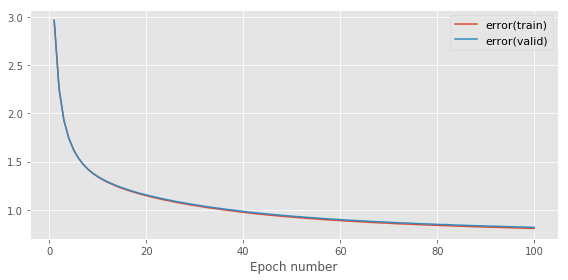

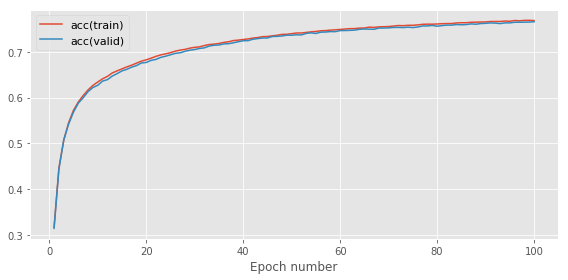

    final error(train) = 8.07e-01
    final error(valid) = 8.17e-01
    final acc(train)   = 7.68e-01
    final acc(valid)   = 7.66e-01
    run time per epoch = 11.03
--------------------------------------------------------------------------------
weight_decay=1.00e-04
--------------------------------------------------------------------------------


Epoch 1: 10.2s to complete
    error(train)=3.11e+00, acc(train)=2.91e-01, error(valid)=3.11e+00, acc(valid)=2.89e-01


Epoch 2: 11.6s to complete
    error(train)=2.59e+00, acc(train)=4.06e-01, error(valid)=2.59e+00, acc(valid)=4.05e-01


Epoch 3: 9.3s to complete
    error(train)=2.36e+00, acc(train)=4.53e-01, error(valid)=2.36e+00, acc(valid)=4.53e-01


Epoch 4: 11.7s to complete
    error(train)=2.24e+00, acc(train)=4.78e-01, error(valid)=2.24e+00, acc(valid)=4.79e-01


Epoch 5: 8.9s to complete
    error(train)=2.18e+00, acc(train)=4.92e-01, error(valid)=2.17e+00, acc(valid)=4.89e-01


Epoch 6: 10.4s to complete
    error(train)=2.13e+00, acc(train)=5.01e-01, error(valid)=2.13e+00, acc(valid)=5.00e-01


Epoch 7: 7.1s to complete
    error(train)=2.10e+00, acc(train)=5.05e-01, error(valid)=2.10e+00, acc(valid)=5.04e-01


Epoch 8: 7.1s to complete
    error(train)=2.07e+00, acc(train)=5.13e-01, error(valid)=2.07e+00, acc(valid)=5.11e-01


Epoch 9: 7.1s to complete
    error(train)=2.06e+00, acc(train)=5.13e-01, error(valid)=2.05e+00, acc(valid)=5.11e-01


Epoch 10: 11.9s to complete
    error(train)=2.04e+00, acc(train)=5.15e-01, error(valid)=2.04e+00, acc(valid)=5.12e-01


Epoch 11: 12.4s to complete
    error(train)=2.03e+00, acc(train)=5.16e-01, error(valid)=2.03e+00, acc(valid)=5.15e-01


Epoch 12: 20.0s to complete
    error(train)=2.02e+00, acc(train)=5.14e-01, error(valid)=2.02e+00, acc(valid)=5.10e-01


Epoch 13: 10.5s to complete
    error(train)=2.01e+00, acc(train)=5.16e-01, error(valid)=2.01e+00, acc(valid)=5.12e-01


Epoch 14: 10.7s to complete
    error(train)=2.00e+00, acc(train)=5.17e-01, error(valid)=2.00e+00, acc(valid)=5.14e-01


Epoch 15: 14.6s to complete
    error(train)=1.99e+00, acc(train)=5.17e-01, error(valid)=1.99e+00, acc(valid)=5.14e-01


Epoch 16: 10.9s to complete
    error(train)=1.99e+00, acc(train)=5.16e-01, error(valid)=1.99e+00, acc(valid)=5.15e-01


Epoch 17: 11.1s to complete
    error(train)=1.98e+00, acc(train)=5.14e-01, error(valid)=1.98e+00, acc(valid)=5.11e-01


Epoch 18: 11.6s to complete
    error(train)=1.98e+00, acc(train)=5.16e-01, error(valid)=1.97e+00, acc(valid)=5.12e-01


Epoch 19: 9.3s to complete
    error(train)=1.97e+00, acc(train)=5.16e-01, error(valid)=1.97e+00, acc(valid)=5.13e-01


Epoch 20: 12.3s to complete
    error(train)=1.97e+00, acc(train)=5.14e-01, error(valid)=1.97e+00, acc(valid)=5.10e-01


Epoch 21: 9.5s to complete
    error(train)=1.97e+00, acc(train)=5.15e-01, error(valid)=1.97e+00, acc(valid)=5.11e-01


Epoch 22: 10.1s to complete
    error(train)=1.96e+00, acc(train)=5.15e-01, error(valid)=1.96e+00, acc(valid)=5.12e-01


Epoch 23: 10.7s to complete
    error(train)=1.96e+00, acc(train)=5.18e-01, error(valid)=1.96e+00, acc(valid)=5.14e-01


Epoch 24: 9.1s to complete
    error(train)=1.96e+00, acc(train)=5.16e-01, error(valid)=1.96e+00, acc(valid)=5.10e-01


Epoch 25: 9.1s to complete
    error(train)=1.96e+00, acc(train)=5.14e-01, error(valid)=1.96e+00, acc(valid)=5.11e-01


Epoch 26: 8.9s to complete
    error(train)=1.95e+00, acc(train)=5.15e-01, error(valid)=1.95e+00, acc(valid)=5.12e-01


Epoch 27: 11.2s to complete
    error(train)=1.95e+00, acc(train)=5.14e-01, error(valid)=1.95e+00, acc(valid)=5.13e-01


Epoch 28: 14.3s to complete
    error(train)=1.95e+00, acc(train)=5.14e-01, error(valid)=1.95e+00, acc(valid)=5.09e-01


Epoch 29: 15.0s to complete
    error(train)=1.95e+00, acc(train)=5.14e-01, error(valid)=1.95e+00, acc(valid)=5.11e-01


Epoch 30: 10.1s to complete
    error(train)=1.95e+00, acc(train)=5.12e-01, error(valid)=1.95e+00, acc(valid)=5.08e-01


Epoch 31: 9.9s to complete
    error(train)=1.95e+00, acc(train)=5.13e-01, error(valid)=1.95e+00, acc(valid)=5.08e-01


Epoch 32: 10.3s to complete
    error(train)=1.95e+00, acc(train)=5.11e-01, error(valid)=1.95e+00, acc(valid)=5.09e-01


Epoch 33: 9.9s to complete
    error(train)=1.95e+00, acc(train)=5.13e-01, error(valid)=1.95e+00, acc(valid)=5.09e-01


Epoch 34: 9.7s to complete
    error(train)=1.95e+00, acc(train)=5.12e-01, error(valid)=1.95e+00, acc(valid)=5.10e-01


Epoch 35: 17.3s to complete
    error(train)=1.95e+00, acc(train)=5.12e-01, error(valid)=1.95e+00, acc(valid)=5.07e-01


Epoch 36: 12.7s to complete
    error(train)=1.95e+00, acc(train)=5.13e-01, error(valid)=1.95e+00, acc(valid)=5.11e-01


Epoch 37: 16.8s to complete
    error(train)=1.94e+00, acc(train)=5.10e-01, error(valid)=1.94e+00, acc(valid)=5.06e-01


Epoch 38: 11.9s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.95e+00, acc(valid)=5.06e-01


Epoch 39: 7.6s to complete
    error(train)=1.94e+00, acc(train)=5.11e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 40: 14.0s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.09e-01


Epoch 41: 13.2s to complete
    error(train)=1.94e+00, acc(train)=5.14e-01, error(valid)=1.94e+00, acc(valid)=5.12e-01


Epoch 42: 15.0s to complete
    error(train)=1.94e+00, acc(train)=5.13e-01, error(valid)=1.94e+00, acc(valid)=5.09e-01


Epoch 43: 7.8s to complete
    error(train)=1.94e+00, acc(train)=5.11e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 44: 7.1s to complete
    error(train)=1.94e+00, acc(train)=5.14e-01, error(valid)=1.94e+00, acc(valid)=5.08e-01


Epoch 45: 10.7s to complete
    error(train)=1.94e+00, acc(train)=5.11e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 46: 10.0s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.06e-01


Epoch 47: 8.9s to complete
    error(train)=1.94e+00, acc(train)=5.11e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 48: 8.2s to complete
    error(train)=1.94e+00, acc(train)=5.10e-01, error(valid)=1.94e+00, acc(valid)=5.05e-01


Epoch 49: 8.6s to complete
    error(train)=1.94e+00, acc(train)=5.14e-01, error(valid)=1.94e+00, acc(valid)=5.10e-01


Epoch 50: 7.5s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.09e-01


Epoch 51: 7.8s to complete
    error(train)=1.94e+00, acc(train)=5.13e-01, error(valid)=1.94e+00, acc(valid)=5.08e-01


Epoch 52: 7.9s to complete
    error(train)=1.94e+00, acc(train)=5.13e-01, error(valid)=1.94e+00, acc(valid)=5.09e-01


Epoch 53: 9.0s to complete
    error(train)=1.94e+00, acc(train)=5.11e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 54: 7.7s to complete
    error(train)=1.94e+00, acc(train)=5.13e-01, error(valid)=1.94e+00, acc(valid)=5.08e-01


Epoch 55: 9.9s to complete
    error(train)=1.94e+00, acc(train)=5.13e-01, error(valid)=1.94e+00, acc(valid)=5.08e-01


Epoch 56: 12.4s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.06e-01


Epoch 57: 8.3s to complete
    error(train)=1.94e+00, acc(train)=5.13e-01, error(valid)=1.94e+00, acc(valid)=5.08e-01


Epoch 58: 9.6s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.09e-01


Epoch 59: 10.4s to complete
    error(train)=1.94e+00, acc(train)=5.14e-01, error(valid)=1.94e+00, acc(valid)=5.08e-01


Epoch 60: 13.1s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.08e-01


Epoch 61: 8.6s to complete
    error(train)=1.94e+00, acc(train)=5.13e-01, error(valid)=1.94e+00, acc(valid)=5.09e-01


Epoch 62: 8.4s to complete
    error(train)=1.94e+00, acc(train)=5.13e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 63: 8.2s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.09e-01


Epoch 64: 8.3s to complete
    error(train)=1.94e+00, acc(train)=5.11e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 65: 9.0s to complete
    error(train)=1.94e+00, acc(train)=5.14e-01, error(valid)=1.94e+00, acc(valid)=5.11e-01


Epoch 66: 13.9s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 67: 8.8s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.06e-01


Epoch 68: 8.3s to complete
    error(train)=1.94e+00, acc(train)=5.14e-01, error(valid)=1.94e+00, acc(valid)=5.09e-01


Epoch 69: 8.6s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.10e-01


Epoch 70: 8.4s to complete
    error(train)=1.94e+00, acc(train)=5.13e-01, error(valid)=1.94e+00, acc(valid)=5.09e-01


Epoch 71: 8.6s to complete
    error(train)=1.94e+00, acc(train)=5.11e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 72: 8.2s to complete
    error(train)=1.94e+00, acc(train)=5.13e-01, error(valid)=1.94e+00, acc(valid)=5.08e-01


Epoch 73: 8.1s to complete
    error(train)=1.94e+00, acc(train)=5.14e-01, error(valid)=1.94e+00, acc(valid)=5.08e-01


Epoch 74: 8.5s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.06e-01


Epoch 75: 8.6s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 76: 14.3s to complete
    error(train)=1.94e+00, acc(train)=5.14e-01, error(valid)=1.94e+00, acc(valid)=5.11e-01


Epoch 77: 11.1s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.07e-01


Epoch 78: 9.5s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.06e-01


Epoch 79: 9.3s to complete
    error(train)=1.94e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.05e-01


Epoch 80: 8.8s to complete
    error(train)=1.93e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.08e-01


Epoch 81: 9.5s to complete
    error(train)=1.93e+00, acc(train)=5.12e-01, error(valid)=1.94e+00, acc(valid)=5.09e-01


Epoch 82: 8.2s to complete
    error(train)=1.94e+00, acc(train)=5.09e-01, error(valid)=1.94e+00, acc(valid)=5.05e-01


Epoch 83: 9.1s to complete
    error(train)=1.93e+00, acc(train)=5.12e-01, error(valid)=1.93e+00, acc(valid)=5.08e-01


Epoch 84: 14.3s to complete
    error(train)=1.93e+00, acc(train)=5.14e-01, error(valid)=1.93e+00, acc(valid)=5.09e-01


Epoch 85: 9.0s to complete
    error(train)=1.93e+00, acc(train)=5.14e-01, error(valid)=1.93e+00, acc(valid)=5.10e-01


Epoch 86: 8.5s to complete
    error(train)=1.93e+00, acc(train)=5.13e-01, error(valid)=1.93e+00, acc(valid)=5.09e-01


Epoch 87: 9.2s to complete
    error(train)=1.93e+00, acc(train)=5.14e-01, error(valid)=1.93e+00, acc(valid)=5.09e-01


Epoch 88: 7.2s to complete
    error(train)=1.93e+00, acc(train)=5.12e-01, error(valid)=1.93e+00, acc(valid)=5.08e-01


Epoch 89: 8.5s to complete
    error(train)=1.93e+00, acc(train)=5.11e-01, error(valid)=1.93e+00, acc(valid)=5.08e-01


Epoch 90: 10.2s to complete
    error(train)=1.93e+00, acc(train)=5.13e-01, error(valid)=1.93e+00, acc(valid)=5.09e-01


Epoch 91: 9.4s to complete
    error(train)=1.93e+00, acc(train)=5.13e-01, error(valid)=1.93e+00, acc(valid)=5.09e-01


Epoch 92: 11.2s to complete
    error(train)=1.93e+00, acc(train)=5.12e-01, error(valid)=1.93e+00, acc(valid)=5.10e-01


Epoch 93: 8.2s to complete
    error(train)=1.93e+00, acc(train)=5.11e-01, error(valid)=1.93e+00, acc(valid)=5.04e-01


Epoch 94: 10.1s to complete
    error(train)=1.93e+00, acc(train)=5.12e-01, error(valid)=1.93e+00, acc(valid)=5.07e-01


Epoch 95: 9.3s to complete
    error(train)=1.93e+00, acc(train)=5.12e-01, error(valid)=1.93e+00, acc(valid)=5.09e-01


Epoch 96: 9.5s to complete
    error(train)=1.93e+00, acc(train)=5.14e-01, error(valid)=1.93e+00, acc(valid)=5.09e-01


Epoch 97: 8.3s to complete
    error(train)=1.93e+00, acc(train)=5.13e-01, error(valid)=1.93e+00, acc(valid)=5.08e-01


Epoch 98: 8.8s to complete
    error(train)=1.93e+00, acc(train)=5.12e-01, error(valid)=1.93e+00, acc(valid)=5.08e-01


Epoch 99: 9.6s to complete
    error(train)=1.93e+00, acc(train)=5.14e-01, error(valid)=1.93e+00, acc(valid)=5.08e-01


Epoch 100: 8.5s to complete
    error(train)=1.93e+00, acc(train)=5.14e-01, error(valid)=1.93e+00, acc(valid)=5.11e-01


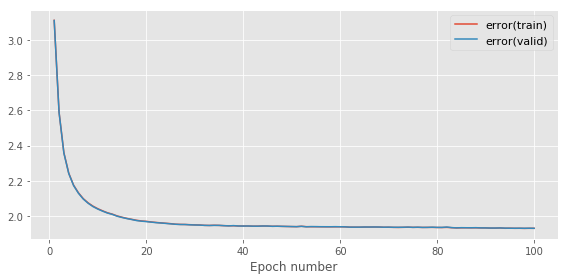

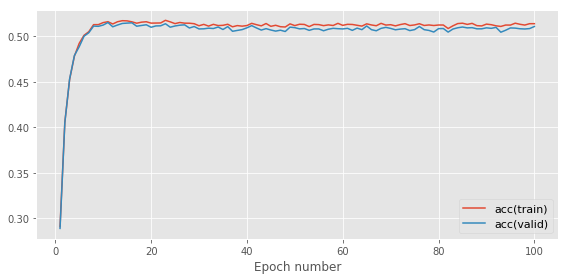

    final error(train) = 1.93e+00
    final error(valid) = 1.93e+00
    final acc(train)   = 5.14e-01
    final acc(valid)   = 5.11e-01
    run time per epoch = 12.91


In [6]:
#setup hyperparameters
learning_rate = 0.000015
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

weight_decays = [0.00001, 0.0001]

for i, weight_decay in enumerate(weight_decays):

    print('-' * 80)
    print('weight_decay={0:.2e}'
          .format(weight_decay))
    print('-' * 80)

    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    # Create a model with three hidden layers
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate, weight_decay=weight_decay)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, None, num_epochs, stats_interval, fig_name='Adam_Weight_Decay_' + str(i) + '.pdf', notebook=True)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

In [8]:
j = 0
print('| num | weight decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-----|--------------|--------------------|--------------------|------------------|------------------|')
for weight_decay in weight_decays:
    print('| {0}  | {1:.2e}  | {2:.2e}   | {3:.2e}   | {4:.2f}      | {5:.2f}       |'
          .format(j, weight_decay, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

| num | weight decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|-----|--------------|--------------------|--------------------|------------------|------------------|


TypeError: unsupported format string passed to tuple.__format__

In [12]:
print (final_accs_train)

[0.7683799999999977, 0.5138599999999998]


## Adam with L2

In [ ]:
#setup hyperparameters
learning_rate = 0.000015
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

weight_decays = [0.00001, 0.0001]

for i, weight_decay in enumerate(weight_decays):

    print('-' * 80)
    print('weight_decay={0:.2e}'
          .format(weight_decay))
    print('-' * 80)

    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    # Create a model with three hidden layers
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, L2Penalty(weight_decay)), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, L2Penalty(weight_decay)), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, L2Penalty(weight_decay)), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, L2Penalty(weight_decay))
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, None, num_epochs, stats_interval, fig_name='Adam_with_L2_' + str(i) + '.pdf', notebook=True)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

In [ ]:
j = 0
print('| num | weight decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-----|--------------|--------------------|--------------------|------------------|------------------|')
for weight_decay in enumerate(weight_decays):
    print('| {0}  | {1:.2e}  | {2:.2e}   | {3:.2e}   | {4:.2f}      | {5:.2f}       |'
          .format(j, weight_decay, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

## Adam Weight Decay with no restart

In [15]:
#setup hyperparameters
learning_rate = 0.000015
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

min_value = 0.0001
max_value = 0.01

weight_decays = [0.00001, 0.0001]

for i, weight_decay in enumerate(weight_decays):

    print('-' * 80)
    print('weight_decay={0:.2e}'
          .format(weight_decay))
    print('-' * 80)

    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    # Create a model with three hidden layers
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate, weight_decay=weight_decay)
    cosine_scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate=min_value, max_learning_rate=max_value,
                                                   total_iters_per_period=100.,
                                                   max_learning_rate_discount_factor=0.9,
                                                   period_iteration_expansion_factor=1.0)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, cosine_scheduler, num_epochs, stats_interval, fig_name='Adam_Weight_Decay_No_Restarts' + str(i) + '.pdf', notebook=True)
    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

--------------------------------------------------------------------------------
weight_decay=1.00e-05
--------------------------------------------------------------------------------


KeyboardInterrupt: 

In [13]:
j = 0
print('| num | weight decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-----|--------------|--------------------|--------------------|------------------|------------------|')
for weight_decay in weight_decays:
    print('| {0}  | {1:.2e}  | {2:.2e}   | {3:.2e}   | {4:.2f}      | {5:.2f}       |'
          .format(j, weight_decay, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

| num | weight decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|-----|--------------|--------------------|--------------------|------------------|------------------|
| 0  | 1.00e-05  | 8.07e-01   | 8.17e-01   | 0.77      | 0.77       |
| 1  | 1.00e-04  | 1.93e+00   | 1.93e+00   | 0.51      | 0.51       |


## Adam Weight Decay with Warm Restarts

--------------------------------------------------------------------------------
weight_decay=1.00e-05
--------------------------------------------------------------------------------


Epoch 1: 9.8s to complete
    error(train)=3.86e+00, acc(train)=2.07e-02, error(valid)=3.86e+00, acc(valid)=2.25e-02


Epoch 2: 8.3s to complete
    error(train)=4.29e+00, acc(train)=2.13e-02, error(valid)=4.30e+00, acc(valid)=2.01e-02


Epoch 3: 13.6s to complete
    error(train)=4.40e+00, acc(train)=2.15e-02, error(valid)=4.38e+00, acc(valid)=2.04e-02


Epoch 4: 14.2s to complete
    error(train)=4.41e+00, acc(train)=2.11e-02, error(valid)=4.43e+00, acc(valid)=2.14e-02


Epoch 5: 12.0s to complete
    error(train)=4.60e+00, acc(train)=2.14e-02, error(valid)=4.59e+00, acc(valid)=2.01e-02


Epoch 6: 15.9s to complete
    error(train)=4.58e+00, acc(train)=2.13e-02, error(valid)=4.60e+00, acc(valid)=2.02e-02


Epoch 7: 11.3s to complete
    error(train)=4.41e+00, acc(train)=2.12e-02, error(valid)=4.40e+00, acc(valid)=2.15e-02


Epoch 8: 17.8s to complete
    error(train)=4.26e+00, acc(train)=2.12e-02, error(valid)=4.27e+00, acc(valid)=2.15e-02


Epoch 9: 19.2s to complete
    error(train)=4.26e+00, acc(train)=2.13e-02, error(valid)=4.27e+00, acc(valid)=2.01e-02


Epoch 10: 21.1s to complete
    error(train)=4.19e+00, acc(train)=2.14e-02, error(valid)=4.20e+00, acc(valid)=1.89e-02


Epoch 11: 37.3s to complete
    error(train)=4.17e+00, acc(train)=2.13e-02, error(valid)=4.16e+00, acc(valid)=2.15e-02


Epoch 12: 20.5s to complete
    error(train)=4.16e+00, acc(train)=2.12e-02, error(valid)=4.16e+00, acc(valid)=2.16e-02


Epoch 13: 20.9s to complete
    error(train)=4.08e+00, acc(train)=2.09e-02, error(valid)=4.08e+00, acc(valid)=2.23e-02


Epoch 14: 22.7s to complete
    error(train)=3.98e+00, acc(train)=2.13e-02, error(valid)=3.98e+00, acc(valid)=2.02e-02


Epoch 15: 27.9s to complete
    error(train)=3.99e+00, acc(train)=2.14e-02, error(valid)=4.00e+00, acc(valid)=2.19e-02


Epoch 16: 21.2s to complete
    error(train)=3.92e+00, acc(train)=2.14e-02, error(valid)=3.93e+00, acc(valid)=2.11e-02


Epoch 17: 20.4s to complete
    error(train)=3.88e+00, acc(train)=2.14e-02, error(valid)=3.88e+00, acc(valid)=1.89e-02


Epoch 18: 29.8s to complete
    error(train)=3.89e+00, acc(train)=2.12e-02, error(valid)=3.89e+00, acc(valid)=2.15e-02


Epoch 19: 28.1s to complete
    error(train)=3.87e+00, acc(train)=2.09e-02, error(valid)=3.87e+00, acc(valid)=2.23e-02


Epoch 20: 21.9s to complete
    error(train)=3.86e+00, acc(train)=2.13e-02, error(valid)=3.86e+00, acc(valid)=2.01e-02


Epoch 21: 21.4s to complete
    error(train)=3.86e+00, acc(train)=2.09e-02, error(valid)=3.86e+00, acc(valid)=2.39e-02


Epoch 22: 19.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 23: 23.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 24: 20.4s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


Epoch 25: 20.8s to complete
    error(train)=4.58e+00, acc(train)=2.12e-02, error(valid)=4.57e+00, acc(valid)=2.19e-02


Epoch 26: 23.6s to complete
    error(train)=4.40e+00, acc(train)=2.08e-02, error(valid)=4.39e+00, acc(valid)=2.01e-02


Epoch 27: 21.4s to complete
    error(train)=4.69e+00, acc(train)=2.12e-02, error(valid)=4.68e+00, acc(valid)=2.22e-02


Epoch 28: 22.1s to complete
    error(train)=4.36e+00, acc(train)=2.17e-02, error(valid)=4.37e+00, acc(valid)=2.01e-02


Epoch 29: 21.0s to complete
    error(train)=4.39e+00, acc(train)=2.11e-02, error(valid)=4.39e+00, acc(valid)=2.25e-02


Epoch 30: 35.0s to complete
    error(train)=4.47e+00, acc(train)=2.08e-02, error(valid)=4.47e+00, acc(valid)=2.41e-02


Epoch 31: 23.5s to complete
    error(train)=4.34e+00, acc(train)=2.14e-02, error(valid)=4.35e+00, acc(valid)=2.11e-02


Epoch 32: 23.0s to complete
    error(train)=4.41e+00, acc(train)=2.08e-02, error(valid)=4.40e+00, acc(valid)=2.41e-02


Epoch 33: 20.3s to complete
    error(train)=4.44e+00, acc(train)=2.13e-02, error(valid)=4.45e+00, acc(valid)=2.02e-02


Epoch 34: 20.4s to complete
    error(train)=4.16e+00, acc(train)=2.14e-02, error(valid)=4.16e+00, acc(valid)=2.11e-02


Epoch 35: 19.7s to complete
    error(train)=4.25e+00, acc(train)=2.17e-02, error(valid)=4.26e+00, acc(valid)=2.01e-02


Epoch 36: 19.7s to complete
    error(train)=4.40e+00, acc(train)=2.08e-02, error(valid)=4.41e+00, acc(valid)=2.01e-02


Epoch 37: 20.3s to complete
    error(train)=4.38e+00, acc(train)=2.12e-02, error(valid)=4.38e+00, acc(valid)=2.16e-02


Epoch 38: 21.7s to complete
    error(train)=4.59e+00, acc(train)=2.14e-02, error(valid)=4.60e+00, acc(valid)=2.03e-02


Epoch 39: 33.2s to complete
    error(train)=4.40e+00, acc(train)=2.14e-02, error(valid)=4.39e+00, acc(valid)=1.88e-02


Epoch 40: 20.5s to complete
    error(train)=4.30e+00, acc(train)=2.11e-02, error(valid)=4.31e+00, acc(valid)=2.25e-02


Epoch 41: 19.9s to complete
    error(train)=4.27e+00, acc(train)=2.14e-02, error(valid)=4.29e+00, acc(valid)=2.01e-02


Epoch 42: 28.0s to complete
    error(train)=4.40e+00, acc(train)=2.12e-02, error(valid)=4.39e+00, acc(valid)=2.22e-02


Epoch 43: 20.7s to complete
    error(train)=4.35e+00, acc(train)=2.12e-02, error(valid)=4.35e+00, acc(valid)=2.19e-02


Epoch 44: 20.4s to complete
    error(train)=4.38e+00, acc(train)=2.09e-02, error(valid)=4.38e+00, acc(valid)=2.39e-02


Epoch 45: 19.8s to complete
    error(train)=4.21e+00, acc(train)=2.13e-02, error(valid)=4.22e+00, acc(valid)=2.02e-02


Epoch 46: 30.3s to complete
    error(train)=4.27e+00, acc(train)=2.10e-02, error(valid)=4.25e+00, acc(valid)=2.26e-02


Epoch 47: 25.6s to complete
    error(train)=4.15e+00, acc(train)=2.12e-02, error(valid)=4.15e+00, acc(valid)=2.11e-02


Epoch 48: 21.0s to complete
    error(train)=4.17e+00, acc(train)=2.13e-02, error(valid)=4.17e+00, acc(valid)=2.15e-02


Epoch 49: 21.1s to complete
    error(train)=4.11e+00, acc(train)=2.09e-02, error(valid)=4.11e+00, acc(valid)=2.23e-02


Epoch 50: 21.6s to complete
    error(train)=4.33e+00, acc(train)=2.15e-02, error(valid)=4.33e+00, acc(valid)=1.99e-02


Epoch 51: 21.1s to complete
    error(train)=4.19e+00, acc(train)=2.13e-02, error(valid)=4.18e+00, acc(valid)=2.15e-02


Epoch 52: 22.0s to complete
    error(train)=4.18e+00, acc(train)=2.12e-02, error(valid)=4.19e+00, acc(valid)=2.11e-02


Epoch 53: 28.7s to complete
    error(train)=4.19e+00, acc(train)=2.10e-02, error(valid)=4.19e+00, acc(valid)=2.26e-02


Epoch 54: 33.1s to complete
    error(train)=4.18e+00, acc(train)=2.15e-02, error(valid)=4.19e+00, acc(valid)=2.04e-02


Epoch 55: 29.6s to complete
    error(train)=4.23e+00, acc(train)=2.10e-02, error(valid)=4.24e+00, acc(valid)=2.26e-02


Epoch 56: 18.9s to complete
    error(train)=4.11e+00, acc(train)=2.17e-02, error(valid)=4.12e+00, acc(valid)=2.01e-02


Epoch 57: 31.4s to complete
    error(train)=4.07e+00, acc(train)=2.13e-02, error(valid)=4.08e+00, acc(valid)=2.01e-02


Epoch 58: 27.8s to complete
    error(train)=4.07e+00, acc(train)=2.13e-02, error(valid)=4.05e+00, acc(valid)=2.15e-02


Epoch 59: 18.4s to complete
    error(train)=4.03e+00, acc(train)=2.12e-02, error(valid)=4.04e+00, acc(valid)=2.19e-02


Epoch 60: 19.1s to complete
    error(train)=4.09e+00, acc(train)=2.14e-02, error(valid)=4.11e+00, acc(valid)=2.23e-02


Epoch 61: 21.5s to complete
    error(train)=4.02e+00, acc(train)=2.14e-02, error(valid)=4.01e+00, acc(valid)=2.23e-02


Epoch 62: 21.3s to complete
    error(train)=4.12e+00, acc(train)=2.17e-02, error(valid)=4.12e+00, acc(valid)=2.01e-02


Epoch 63: 19.6s to complete
    error(train)=4.01e+00, acc(train)=2.13e-02, error(valid)=4.00e+00, acc(valid)=2.20e-02


Epoch 64: 21.3s to complete
    error(train)=3.97e+00, acc(train)=2.15e-02, error(valid)=3.97e+00, acc(valid)=2.01e-02


Epoch 65: 21.8s to complete
    error(train)=3.97e+00, acc(train)=2.14e-02, error(valid)=3.98e+00, acc(valid)=2.03e-02


Epoch 66: 21.4s to complete
    error(train)=4.05e+00, acc(train)=2.13e-02, error(valid)=4.06e+00, acc(valid)=2.20e-02


Epoch 67: 20.4s to complete
    error(train)=4.02e+00, acc(train)=2.12e-02, error(valid)=4.03e+00, acc(valid)=2.04e-02


Epoch 68: 24.1s to complete
    error(train)=3.93e+00, acc(train)=2.12e-02, error(valid)=3.93e+00, acc(valid)=2.11e-02


Epoch 69: 27.5s to complete
    error(train)=3.94e+00, acc(train)=2.12e-02, error(valid)=3.94e+00, acc(valid)=2.15e-02


Epoch 70: 25.2s to complete
    error(train)=3.97e+00, acc(train)=2.12e-02, error(valid)=3.96e+00, acc(valid)=2.16e-02


Epoch 71: 28.7s to complete
    error(train)=3.93e+00, acc(train)=2.12e-02, error(valid)=3.93e+00, acc(valid)=2.19e-02


Epoch 72: 33.7s to complete
    error(train)=3.92e+00, acc(train)=2.17e-02, error(valid)=3.93e+00, acc(valid)=1.96e-02


Epoch 73: 23.4s to complete
    error(train)=3.93e+00, acc(train)=2.12e-02, error(valid)=3.92e+00, acc(valid)=2.19e-02


Epoch 74: 31.4s to complete
    error(train)=3.91e+00, acc(train)=2.13e-02, error(valid)=3.91e+00, acc(valid)=2.21e-02


Epoch 75: 26.9s to complete
    error(train)=3.91e+00, acc(train)=2.15e-02, error(valid)=3.91e+00, acc(valid)=2.01e-02


Epoch 76: 26.6s to complete
    error(train)=3.91e+00, acc(train)=2.13e-02, error(valid)=3.91e+00, acc(valid)=2.08e-02


Epoch 77: 23.8s to complete
    error(train)=3.90e+00, acc(train)=2.17e-02, error(valid)=3.90e+00, acc(valid)=1.98e-02


Epoch 78: 24.5s to complete
    error(train)=3.88e+00, acc(train)=2.13e-02, error(valid)=3.88e+00, acc(valid)=2.21e-02


Epoch 79: 23.1s to complete
    error(train)=3.88e+00, acc(train)=2.12e-02, error(valid)=3.88e+00, acc(valid)=2.16e-02


Epoch 80: 25.8s to complete
    error(train)=3.87e+00, acc(train)=2.13e-02, error(valid)=3.87e+00, acc(valid)=2.08e-02


Epoch 81: 23.0s to complete
    error(train)=3.87e+00, acc(train)=2.12e-02, error(valid)=3.87e+00, acc(valid)=2.22e-02


Epoch 82: 23.5s to complete
    error(train)=3.87e+00, acc(train)=2.11e-02, error(valid)=3.87e+00, acc(valid)=2.13e-02


Epoch 83: 22.2s to complete
    error(train)=3.87e+00, acc(train)=2.10e-02, error(valid)=3.87e+00, acc(valid)=2.26e-02


Epoch 84: 23.2s to complete
    error(train)=3.87e+00, acc(train)=2.11e-02, error(valid)=3.87e+00, acc(valid)=2.25e-02


Epoch 85: 22.6s to complete
    error(train)=3.86e+00, acc(train)=2.12e-02, error(valid)=3.86e+00, acc(valid)=2.19e-02


Epoch 86: 25.1s to complete
    error(train)=3.86e+00, acc(train)=2.12e-02, error(valid)=3.86e+00, acc(valid)=2.16e-02


Epoch 87: 24.8s to complete
    error(train)=3.86e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


Epoch 88: 23.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 89: 16.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 90: 14.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 91: 14.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


Epoch 92: 14.0s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 93: 17.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


Epoch 94: 14.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


Epoch 95: 15.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


Epoch 96: 14.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 97: 14.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


Epoch 98: 14.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


Epoch 99: 14.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


Epoch 100: 13.8s to complete
    error(train)=4.38e+00, acc(train)=2.14e-02, error(valid)=4.39e+00, acc(valid)=1.89e-02


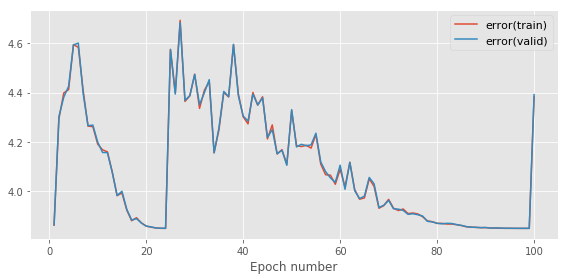

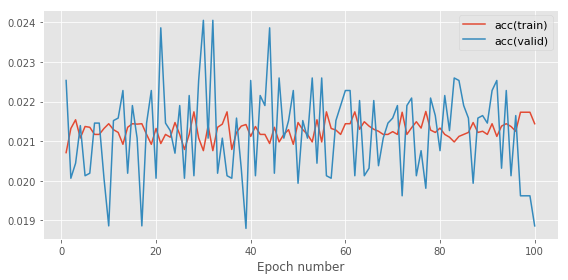

    final error(train) = 4.38e+00
    final error(valid) = 4.39e+00
    final acc(train)   = 2.14e-02
    final acc(valid)   = 1.89e-02
    run time per epoch = 24.67
--------------------------------------------------------------------------------
weight_decay=1.00e-04
--------------------------------------------------------------------------------


Epoch 1: 4.6s to complete
    error(train)=3.86e+00, acc(train)=2.07e-02, error(valid)=3.86e+00, acc(valid)=2.25e-02


Epoch 2: 5.5s to complete
    error(train)=4.37e+00, acc(train)=2.13e-02, error(valid)=4.38e+00, acc(valid)=2.08e-02


Epoch 3: 5.7s to complete
    error(train)=4.29e+00, acc(train)=2.10e-02, error(valid)=4.29e+00, acc(valid)=2.26e-02


Epoch 4: 5.6s to complete
    error(train)=4.26e+00, acc(train)=2.08e-02, error(valid)=4.26e+00, acc(valid)=2.41e-02


Epoch 5: 7.0s to complete
    error(train)=4.25e+00, acc(train)=2.12e-02, error(valid)=4.25e+00, acc(valid)=2.16e-02


Epoch 6: 7.2s to complete
    error(train)=4.43e+00, acc(train)=2.12e-02, error(valid)=4.45e+00, acc(valid)=2.16e-02


Epoch 7: 7.5s to complete
    error(train)=4.25e+00, acc(train)=2.09e-02, error(valid)=4.24e+00, acc(valid)=2.23e-02


Epoch 8: 9.7s to complete
    error(train)=4.12e+00, acc(train)=2.15e-02, error(valid)=4.12e+00, acc(valid)=2.04e-02


Epoch 9: 27.7s to complete
    error(train)=4.15e+00, acc(train)=2.13e-02, error(valid)=4.16e+00, acc(valid)=2.01e-02


Epoch 10: 20.9s to complete
    error(train)=4.14e+00, acc(train)=2.12e-02, error(valid)=4.14e+00, acc(valid)=2.19e-02


Epoch 11: 15.4s to complete
    error(train)=4.03e+00, acc(train)=2.12e-02, error(valid)=4.03e+00, acc(valid)=2.16e-02


Epoch 12: 16.5s to complete
    error(train)=4.07e+00, acc(train)=2.12e-02, error(valid)=4.06e+00, acc(valid)=2.16e-02


Epoch 13: 19.3s to complete
    error(train)=4.02e+00, acc(train)=2.09e-02, error(valid)=4.02e+00, acc(valid)=2.23e-02


Epoch 14: 15.1s to complete
    error(train)=3.96e+00, acc(train)=2.13e-02, error(valid)=3.96e+00, acc(valid)=2.02e-02


Epoch 15: 19.2s to complete
    error(train)=3.96e+00, acc(train)=2.13e-02, error(valid)=3.97e+00, acc(valid)=2.16e-02


Epoch 16: 18.1s to complete
    error(train)=3.91e+00, acc(train)=2.14e-02, error(valid)=3.91e+00, acc(valid)=2.11e-02


Epoch 17: 33.8s to complete
    error(train)=3.88e+00, acc(train)=2.14e-02, error(valid)=3.88e+00, acc(valid)=1.89e-02


Epoch 18: 52.1s to complete
    error(train)=3.89e+00, acc(train)=2.12e-02, error(valid)=3.88e+00, acc(valid)=2.15e-02


Epoch 19: 61.3s to complete
    error(train)=3.87e+00, acc(train)=2.09e-02, error(valid)=3.87e+00, acc(valid)=2.23e-02


Epoch 20: 52.6s to complete
    error(train)=3.86e+00, acc(train)=2.13e-02, error(valid)=3.86e+00, acc(valid)=2.01e-02


Epoch 21: 65.3s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.86e+00, acc(valid)=2.39e-02


Epoch 22: 72.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 23: 73.0s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 24: 61.6s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


Epoch 25: 62.4s to complete
    error(train)=4.54e+00, acc(train)=2.12e-02, error(valid)=4.55e+00, acc(valid)=2.11e-02


Epoch 26: 71.6s to complete
    error(train)=4.30e+00, acc(train)=2.08e-02, error(valid)=4.29e+00, acc(valid)=2.01e-02


Epoch 27: 62.8s to complete
    error(train)=4.58e+00, acc(train)=2.12e-02, error(valid)=4.56e+00, acc(valid)=2.22e-02


Epoch 28: 62.5s to complete
    error(train)=4.23e+00, acc(train)=2.12e-02, error(valid)=4.24e+00, acc(valid)=2.16e-02


Epoch 29: 54.8s to complete
    error(train)=4.21e+00, acc(train)=2.11e-02, error(valid)=4.20e+00, acc(valid)=2.25e-02


Epoch 30: 60.4s to complete
    error(train)=4.27e+00, acc(train)=2.13e-02, error(valid)=4.27e+00, acc(valid)=2.01e-02


Epoch 31: 54.5s to complete
    error(train)=4.25e+00, acc(train)=2.11e-02, error(valid)=4.26e+00, acc(valid)=2.25e-02


Epoch 32: 55.8s to complete
    error(train)=4.20e+00, acc(train)=2.13e-02, error(valid)=4.20e+00, acc(valid)=2.08e-02


Epoch 33: 55.6s to complete
    error(train)=4.33e+00, acc(train)=2.12e-02, error(valid)=4.34e+00, acc(valid)=2.16e-02


Epoch 34: 56.9s to complete
    error(train)=4.14e+00, acc(train)=2.11e-02, error(valid)=4.13e+00, acc(valid)=2.20e-02


Epoch 35: 68.6s to complete
    error(train)=4.21e+00, acc(train)=2.15e-02, error(valid)=4.22e+00, acc(valid)=1.99e-02


Epoch 36: 49.3s to complete
    error(train)=4.29e+00, acc(train)=2.12e-02, error(valid)=4.29e+00, acc(valid)=2.22e-02


Epoch 37: 49.1s to complete
    error(train)=4.15e+00, acc(train)=2.12e-02, error(valid)=4.15e+00, acc(valid)=2.16e-02


Epoch 38: 63.6s to complete
    error(train)=4.51e+00, acc(train)=2.12e-02, error(valid)=4.52e+00, acc(valid)=2.11e-02


Epoch 39: 65.6s to complete
    error(train)=4.17e+00, acc(train)=2.08e-02, error(valid)=4.17e+00, acc(valid)=2.41e-02


Epoch 40: 62.7s to complete
    error(train)=4.12e+00, acc(train)=2.14e-02, error(valid)=4.12e+00, acc(valid)=2.19e-02


Epoch 41: 62.3s to complete
    error(train)=4.16e+00, acc(train)=2.10e-02, error(valid)=4.16e+00, acc(valid)=2.26e-02


Epoch 42: 62.9s to complete
    error(train)=4.26e+00, acc(train)=2.13e-02, error(valid)=4.26e+00, acc(valid)=2.20e-02


Epoch 43: 60.7s to complete
    error(train)=4.10e+00, acc(train)=2.13e-02, error(valid)=4.09e+00, acc(valid)=2.16e-02


Epoch 44: 59.7s to complete
    error(train)=4.21e+00, acc(train)=2.09e-02, error(valid)=4.20e+00, acc(valid)=2.39e-02


Epoch 45: 58.7s to complete
    error(train)=4.20e+00, acc(train)=2.13e-02, error(valid)=4.21e+00, acc(valid)=2.02e-02


Epoch 46: 58.8s to complete
    error(train)=4.13e+00, acc(train)=2.12e-02, error(valid)=4.12e+00, acc(valid)=2.16e-02


Epoch 47: 59.4s to complete
    error(train)=4.07e+00, acc(train)=2.11e-02, error(valid)=4.06e+00, acc(valid)=2.20e-02


Epoch 48: 59.9s to complete
    error(train)=4.07e+00, acc(train)=2.09e-02, error(valid)=4.07e+00, acc(valid)=2.39e-02


Epoch 49: 60.9s to complete
    error(train)=4.08e+00, acc(train)=2.09e-02, error(valid)=4.08e+00, acc(valid)=2.23e-02


Epoch 50: 58.2s to complete
    error(train)=4.16e+00, acc(train)=2.14e-02, error(valid)=4.17e+00, acc(valid)=2.01e-02


KeyboardInterrupt: 

In [16]:
#setup hyperparameters
learning_rate = 0.000015
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

weight_decays = [0.00001, 0.0001]
min_value = 0.0001
max_value = 0.01

for i, weight_decay in enumerate(weight_decays):

    print('-' * 80)
    print('weight_decay={0:.2e}'
          .format(weight_decay))
    print('-' * 80)

    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    # Create a model with three hidden layers
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate, weight_decay=weight_decay)
    cosine_scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate=min_value, max_learning_rate=max_value,
                                                   total_iters_per_period=25.,
                                                   max_learning_rate_discount_factor=0.9,
                                                   period_iteration_expansion_factor=3.0)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, cosine_scheduler, num_epochs, stats_interval, fig_name='Adam_Weight_Decay_No_Restarts' + str(i) + '.pdf', notebook=True)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    runii time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

In [ ]:
j = 0
print('| num | weight decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-----|--------------|--------------------|--------------------|------------------|------------------|')
for weight_decay in weight_decays:
    print('| {0}  | {1:.2e}  | {2:.2e}   | {3:.2e}   | {4:.2f}      | {5:.2f}       |'
          .format(j, weight_decay, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

## TEST ALL THREE MODELS

### batch_size = 100

In [ ]:
# Set batch size
batch_size = 100

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

## Adam with weight decay

In [21]:
#setup hyperparameters
learning_rate = 0.000015
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weight_decay = 0.00001

print('-' * 80)
print('weight_decay={0:.2e}'
      .format(weight_decay))
print('-' * 80)

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create a model with three hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate, weight_decay=weight_decay)

#Remember to use notebook=False when you write a script to be run in a terminal
stats_1, keys_1, run_time_1 = test_model(
    model, error, learning_rule, train_data, test_data, None, num_epochs, stats_interval, notebook=True)


print('    final error(train) = {0:.2e}'.format(stats_1[-1, keys_1['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats_1[-1, keys_1['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats_1[-1, keys_1['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats_1[-1, keys_1['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time_1 * 1. / num_epochs))

--------------------------------------------------------------------------------
weight_decay=1.00e-05
--------------------------------------------------------------------------------


Epoch 1: 5.0s to complete
    error(train)=2.96e+00, acc(train)=3.17e-01, error(valid)=2.98e+00, acc(valid)=3.09e-01


Epoch 2: 6.1s to complete
    error(train)=2.26e+00, acc(train)=4.47e-01, error(valid)=2.28e+00, acc(valid)=4.42e-01


Epoch 3: 4.5s to complete
    error(train)=1.93e+00, acc(train)=5.07e-01, error(valid)=1.95e+00, acc(valid)=5.00e-01


Epoch 4: 4.5s to complete
    error(train)=1.74e+00, acc(train)=5.45e-01, error(valid)=1.77e+00, acc(valid)=5.37e-01


Epoch 5: 4.4s to complete
    error(train)=1.62e+00, acc(train)=5.72e-01, error(valid)=1.65e+00, acc(valid)=5.62e-01


Epoch 6: 4.6s to complete
    error(train)=1.54e+00, acc(train)=5.90e-01, error(valid)=1.56e+00, acc(valid)=5.81e-01


Epoch 7: 4.4s to complete
    error(train)=1.47e+00, acc(train)=6.05e-01, error(valid)=1.50e+00, acc(valid)=5.96e-01


Epoch 8: 4.7s to complete
    error(train)=1.42e+00, acc(train)=6.17e-01, error(valid)=1.44e+00, acc(valid)=6.04e-01


Epoch 9: 4.8s to complete
    error(train)=1.38e+00, acc(train)=6.27e-01, error(valid)=1.40e+00, acc(valid)=6.16e-01


Epoch 10: 4.7s to complete
    error(train)=1.34e+00, acc(train)=6.34e-01, error(valid)=1.37e+00, acc(valid)=6.25e-01


Epoch 11: 4.9s to complete
    error(train)=1.31e+00, acc(train)=6.41e-01, error(valid)=1.34e+00, acc(valid)=6.31e-01


Epoch 12: 4.7s to complete
    error(train)=1.28e+00, acc(train)=6.46e-01, error(valid)=1.31e+00, acc(valid)=6.36e-01


Epoch 13: 4.8s to complete
    error(train)=1.26e+00, acc(train)=6.54e-01, error(valid)=1.29e+00, acc(valid)=6.42e-01


Epoch 14: 4.9s to complete
    error(train)=1.24e+00, acc(train)=6.59e-01, error(valid)=1.27e+00, acc(valid)=6.48e-01


Epoch 15: 5.0s to complete
    error(train)=1.22e+00, acc(train)=6.63e-01, error(valid)=1.25e+00, acc(valid)=6.52e-01


Epoch 16: 5.0s to complete
    error(train)=1.20e+00, acc(train)=6.67e-01, error(valid)=1.23e+00, acc(valid)=6.57e-01


Epoch 17: 4.7s to complete
    error(train)=1.19e+00, acc(train)=6.71e-01, error(valid)=1.22e+00, acc(valid)=6.61e-01


Epoch 18: 5.5s to complete
    error(train)=1.17e+00, acc(train)=6.75e-01, error(valid)=1.20e+00, acc(valid)=6.66e-01


Epoch 19: 5.0s to complete
    error(train)=1.16e+00, acc(train)=6.80e-01, error(valid)=1.19e+00, acc(valid)=6.69e-01


Epoch 20: 7.0s to complete
    error(train)=1.15e+00, acc(train)=6.83e-01, error(valid)=1.18e+00, acc(valid)=6.72e-01


Epoch 21: 7.8s to complete
    error(train)=1.13e+00, acc(train)=6.86e-01, error(valid)=1.16e+00, acc(valid)=6.75e-01


Epoch 22: 5.7s to complete
    error(train)=1.12e+00, acc(train)=6.90e-01, error(valid)=1.15e+00, acc(valid)=6.77e-01


Epoch 23: 5.3s to complete
    error(train)=1.11e+00, acc(train)=6.93e-01, error(valid)=1.14e+00, acc(valid)=6.80e-01


Epoch 24: 5.4s to complete
    error(train)=1.10e+00, acc(train)=6.96e-01, error(valid)=1.13e+00, acc(valid)=6.83e-01


Epoch 25: 4.2s to complete
    error(train)=1.09e+00, acc(train)=6.98e-01, error(valid)=1.12e+00, acc(valid)=6.85e-01


Epoch 26: 4.9s to complete
    error(train)=1.08e+00, acc(train)=7.02e-01, error(valid)=1.11e+00, acc(valid)=6.88e-01


Epoch 27: 4.2s to complete
    error(train)=1.07e+00, acc(train)=7.04e-01, error(valid)=1.10e+00, acc(valid)=6.89e-01


Epoch 28: 4.8s to complete
    error(train)=1.06e+00, acc(train)=7.05e-01, error(valid)=1.09e+00, acc(valid)=6.91e-01


Epoch 29: 4.7s to complete
    error(train)=1.05e+00, acc(train)=7.08e-01, error(valid)=1.08e+00, acc(valid)=6.94e-01


Epoch 30: 4.3s to complete
    error(train)=1.04e+00, acc(train)=7.10e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


Epoch 31: 4.1s to complete
    error(train)=1.04e+00, acc(train)=7.11e-01, error(valid)=1.07e+00, acc(valid)=6.97e-01


Epoch 32: 5.3s to complete
    error(train)=1.03e+00, acc(train)=7.14e-01, error(valid)=1.06e+00, acc(valid)=6.99e-01


Epoch 33: 4.8s to complete
    error(train)=1.02e+00, acc(train)=7.16e-01, error(valid)=1.05e+00, acc(valid)=7.02e-01


Epoch 34: 6.1s to complete
    error(train)=1.01e+00, acc(train)=7.17e-01, error(valid)=1.04e+00, acc(valid)=7.03e-01


Epoch 35: 4.3s to complete
    error(train)=1.01e+00, acc(train)=7.18e-01, error(valid)=1.04e+00, acc(valid)=7.04e-01


Epoch 36: 5.4s to complete
    error(train)=9.99e-01, acc(train)=7.21e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


Epoch 37: 5.2s to complete
    error(train)=9.92e-01, acc(train)=7.22e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


Epoch 38: 5.2s to complete
    error(train)=9.86e-01, acc(train)=7.25e-01, error(valid)=1.02e+00, acc(valid)=7.09e-01


Epoch 39: 5.1s to complete
    error(train)=9.80e-01, acc(train)=7.26e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


Epoch 40: 6.2s to complete
    error(train)=9.74e-01, acc(train)=7.27e-01, error(valid)=1.01e+00, acc(valid)=7.11e-01


Epoch 41: 4.9s to complete
    error(train)=9.68e-01, acc(train)=7.28e-01, error(valid)=1.00e+00, acc(valid)=7.13e-01


Epoch 42: 4.9s to complete
    error(train)=9.62e-01, acc(train)=7.30e-01, error(valid)=9.96e-01, acc(valid)=7.14e-01


Epoch 43: 5.0s to complete
    error(train)=9.56e-01, acc(train)=7.31e-01, error(valid)=9.90e-01, acc(valid)=7.16e-01


Epoch 44: 5.0s to complete
    error(train)=9.51e-01, acc(train)=7.33e-01, error(valid)=9.85e-01, acc(valid)=7.16e-01


Epoch 45: 5.1s to complete
    error(train)=9.46e-01, acc(train)=7.34e-01, error(valid)=9.80e-01, acc(valid)=7.17e-01


Epoch 46: 7.1s to complete
    error(train)=9.41e-01, acc(train)=7.35e-01, error(valid)=9.75e-01, acc(valid)=7.19e-01


Epoch 47: 5.0s to complete
    error(train)=9.37e-01, acc(train)=7.36e-01, error(valid)=9.71e-01, acc(valid)=7.21e-01


Epoch 48: 4.6s to complete
    error(train)=9.32e-01, acc(train)=7.38e-01, error(valid)=9.67e-01, acc(valid)=7.21e-01


Epoch 49: 5.0s to complete
    error(train)=9.28e-01, acc(train)=7.38e-01, error(valid)=9.61e-01, acc(valid)=7.22e-01


Epoch 50: 4.6s to complete
    error(train)=9.24e-01, acc(train)=7.40e-01, error(valid)=9.59e-01, acc(valid)=7.23e-01


Epoch 51: 5.5s to complete
    error(train)=9.20e-01, acc(train)=7.41e-01, error(valid)=9.54e-01, acc(valid)=7.23e-01


Epoch 52: 14.0s to complete
    error(train)=9.16e-01, acc(train)=7.41e-01, error(valid)=9.51e-01, acc(valid)=7.24e-01


Epoch 53: 7.8s to complete
    error(train)=9.11e-01, acc(train)=7.42e-01, error(valid)=9.46e-01, acc(valid)=7.26e-01


Epoch 54: 4.6s to complete
    error(train)=9.08e-01, acc(train)=7.44e-01, error(valid)=9.42e-01, acc(valid)=7.27e-01


Epoch 55: 7.5s to complete
    error(train)=9.04e-01, acc(train)=7.45e-01, error(valid)=9.39e-01, acc(valid)=7.27e-01


Epoch 56: 6.6s to complete
    error(train)=9.00e-01, acc(train)=7.46e-01, error(valid)=9.36e-01, acc(valid)=7.27e-01


Epoch 57: 5.7s to complete
    error(train)=8.96e-01, acc(train)=7.46e-01, error(valid)=9.32e-01, acc(valid)=7.29e-01


Epoch 58: 7.8s to complete
    error(train)=8.94e-01, acc(train)=7.48e-01, error(valid)=9.29e-01, acc(valid)=7.30e-01


Epoch 59: 7.1s to complete
    error(train)=8.90e-01, acc(train)=7.48e-01, error(valid)=9.25e-01, acc(valid)=7.31e-01


Epoch 60: 6.8s to complete
    error(train)=8.87e-01, acc(train)=7.49e-01, error(valid)=9.23e-01, acc(valid)=7.31e-01


Epoch 61: 8.2s to complete
    error(train)=8.84e-01, acc(train)=7.50e-01, error(valid)=9.19e-01, acc(valid)=7.32e-01


Epoch 62: 5.0s to complete
    error(train)=8.81e-01, acc(train)=7.51e-01, error(valid)=9.16e-01, acc(valid)=7.35e-01


Epoch 63: 3.9s to complete
    error(train)=8.79e-01, acc(train)=7.51e-01, error(valid)=9.15e-01, acc(valid)=7.33e-01


Epoch 64: 4.4s to complete
    error(train)=8.75e-01, acc(train)=7.52e-01, error(valid)=9.11e-01, acc(valid)=7.35e-01


Epoch 65: 4.0s to complete
    error(train)=8.73e-01, acc(train)=7.52e-01, error(valid)=9.09e-01, acc(valid)=7.34e-01


Epoch 66: 4.4s to complete
    error(train)=8.69e-01, acc(train)=7.54e-01, error(valid)=9.05e-01, acc(valid)=7.36e-01


Epoch 67: 6.5s to complete
    error(train)=8.67e-01, acc(train)=7.53e-01, error(valid)=9.03e-01, acc(valid)=7.36e-01


Epoch 68: 4.6s to complete
    error(train)=8.64e-01, acc(train)=7.55e-01, error(valid)=9.01e-01, acc(valid)=7.37e-01


Epoch 69: 7.9s to complete
    error(train)=8.62e-01, acc(train)=7.55e-01, error(valid)=8.98e-01, acc(valid)=7.37e-01


Epoch 70: 6.3s to complete
    error(train)=8.60e-01, acc(train)=7.55e-01, error(valid)=8.97e-01, acc(valid)=7.36e-01


Epoch 71: 9.1s to complete
    error(train)=8.57e-01, acc(train)=7.56e-01, error(valid)=8.93e-01, acc(valid)=7.40e-01


Epoch 72: 6.0s to complete
    error(train)=8.55e-01, acc(train)=7.58e-01, error(valid)=8.92e-01, acc(valid)=7.39e-01


Epoch 73: 5.5s to complete
    error(train)=8.52e-01, acc(train)=7.57e-01, error(valid)=8.90e-01, acc(valid)=7.38e-01


Epoch 74: 5.5s to complete
    error(train)=8.51e-01, acc(train)=7.58e-01, error(valid)=8.88e-01, acc(valid)=7.41e-01


Epoch 75: 6.0s to complete
    error(train)=8.48e-01, acc(train)=7.58e-01, error(valid)=8.85e-01, acc(valid)=7.41e-01


Epoch 76: 5.4s to complete
    error(train)=8.46e-01, acc(train)=7.59e-01, error(valid)=8.83e-01, acc(valid)=7.41e-01


Epoch 77: 5.3s to complete
    error(train)=8.44e-01, acc(train)=7.60e-01, error(valid)=8.80e-01, acc(valid)=7.42e-01


Epoch 78: 5.8s to complete
    error(train)=8.42e-01, acc(train)=7.61e-01, error(valid)=8.79e-01, acc(valid)=7.43e-01


Epoch 79: 5.3s to complete
    error(train)=8.40e-01, acc(train)=7.60e-01, error(valid)=8.77e-01, acc(valid)=7.43e-01


Epoch 80: 5.2s to complete
    error(train)=8.38e-01, acc(train)=7.61e-01, error(valid)=8.75e-01, acc(valid)=7.43e-01


Epoch 81: 5.5s to complete
    error(train)=8.36e-01, acc(train)=7.62e-01, error(valid)=8.73e-01, acc(valid)=7.45e-01


Epoch 82: 5.2s to complete
    error(train)=8.35e-01, acc(train)=7.62e-01, error(valid)=8.72e-01, acc(valid)=7.46e-01


Epoch 83: 5.3s to complete
    error(train)=8.33e-01, acc(train)=7.62e-01, error(valid)=8.70e-01, acc(valid)=7.47e-01


Epoch 84: 5.3s to complete
    error(train)=8.30e-01, acc(train)=7.63e-01, error(valid)=8.66e-01, acc(valid)=7.47e-01


Epoch 85: 9.6s to complete
    error(train)=8.29e-01, acc(train)=7.64e-01, error(valid)=8.66e-01, acc(valid)=7.47e-01


Epoch 86: 5.7s to complete
    error(train)=8.27e-01, acc(train)=7.64e-01, error(valid)=8.64e-01, acc(valid)=7.48e-01


Epoch 87: 6.3s to complete
    error(train)=8.26e-01, acc(train)=7.65e-01, error(valid)=8.62e-01, acc(valid)=7.48e-01


Epoch 88: 5.8s to complete
    error(train)=8.23e-01, acc(train)=7.65e-01, error(valid)=8.61e-01, acc(valid)=7.49e-01


Epoch 89: 5.6s to complete
    error(train)=8.22e-01, acc(train)=7.65e-01, error(valid)=8.60e-01, acc(valid)=7.49e-01


Epoch 90: 6.2s to complete
    error(train)=8.21e-01, acc(train)=7.65e-01, error(valid)=8.58e-01, acc(valid)=7.50e-01


Epoch 91: 5.7s to complete
    error(train)=8.19e-01, acc(train)=7.66e-01, error(valid)=8.56e-01, acc(valid)=7.50e-01


Epoch 92: 5.5s to complete
    error(train)=8.18e-01, acc(train)=7.66e-01, error(valid)=8.56e-01, acc(valid)=7.51e-01


Epoch 93: 5.7s to complete
    error(train)=8.17e-01, acc(train)=7.66e-01, error(valid)=8.54e-01, acc(valid)=7.49e-01


Epoch 94: 5.8s to complete
    error(train)=8.15e-01, acc(train)=7.67e-01, error(valid)=8.53e-01, acc(valid)=7.50e-01


Epoch 95: 5.7s to complete
    error(train)=8.14e-01, acc(train)=7.67e-01, error(valid)=8.52e-01, acc(valid)=7.50e-01


Epoch 96: 5.6s to complete
    error(train)=8.12e-01, acc(train)=7.69e-01, error(valid)=8.50e-01, acc(valid)=7.51e-01


Epoch 97: 5.7s to complete
    error(train)=8.10e-01, acc(train)=7.68e-01, error(valid)=8.49e-01, acc(valid)=7.50e-01


Epoch 98: 6.0s to complete
    error(train)=8.09e-01, acc(train)=7.69e-01, error(valid)=8.47e-01, acc(valid)=7.52e-01


Epoch 99: 6.5s to complete
    error(train)=8.07e-01, acc(train)=7.69e-01, error(valid)=8.45e-01, acc(valid)=7.52e-01


Epoch 100: 5.9s to complete
    error(train)=8.07e-01, acc(train)=7.68e-01, error(valid)=8.44e-01, acc(valid)=7.55e-01



    final error(train) = 8.07e-01
    final error(valid) = 8.44e-01
    final acc(train)   = 7.68e-01
    final acc(valid)   = 7.55e-01
    run time per epoch = 7.07


## Adam with L2 regularization

In [22]:
#setup hyperparameters
learning_rate = 0.000015
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weight_decay = 0.0001

print('-' * 80)
print('weight_decay={0:.2e}'
      .format(weight_decay))
print('-' * 80)

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create a model with three hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, L2Penalty(weight_decay)), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, L2Penalty(weight_decay)), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, L2Penalty(weight_decay)), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, L2Penalty(weight_decay))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
stats_2, keys_2, run_time_2 = test_model(
    model, error, learning_rule, train_data, test_data, None, num_epochs, stats_interval, notebook=True)


print('    final error(train) = {0:.2e}'.format(stats_2[-1, keys_2['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats_2[-1, keys_2['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats_2[-1, keys_2['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats_2[-1, keys_2['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time_2 * 1. / num_epochs))

--------------------------------------------------------------------------------
weight_decay=1.00e-04
--------------------------------------------------------------------------------


Epoch 1: 6.8s to complete
    error(train)=2.95e+00, acc(train)=3.20e-01, error(valid)=2.96e+00, acc(valid)=3.12e-01


Epoch 2: 5.9s to complete
    error(train)=2.23e+00, acc(train)=4.51e-01, error(valid)=2.25e+00, acc(valid)=4.47e-01


Epoch 3: 12.5s to complete
    error(train)=1.89e+00, acc(train)=5.11e-01, error(valid)=1.91e+00, acc(valid)=5.05e-01


Epoch 4: 7.1s to complete
    error(train)=1.70e+00, acc(train)=5.50e-01, error(valid)=1.73e+00, acc(valid)=5.43e-01


Epoch 5: 4.7s to complete
    error(train)=1.58e+00, acc(train)=5.77e-01, error(valid)=1.60e+00, acc(valid)=5.66e-01


Epoch 6: 7.3s to complete
    error(train)=1.49e+00, acc(train)=5.97e-01, error(valid)=1.51e+00, acc(valid)=5.87e-01


Epoch 7: 4.5s to complete
    error(train)=1.42e+00, acc(train)=6.12e-01, error(valid)=1.45e+00, acc(valid)=6.01e-01


Epoch 8: 4.9s to complete
    error(train)=1.37e+00, acc(train)=6.24e-01, error(valid)=1.39e+00, acc(valid)=6.13e-01


Epoch 9: 5.1s to complete
    error(train)=1.32e+00, acc(train)=6.36e-01, error(valid)=1.35e+00, acc(valid)=6.25e-01


Epoch 10: 5.1s to complete
    error(train)=1.28e+00, acc(train)=6.43e-01, error(valid)=1.31e+00, acc(valid)=6.31e-01


Epoch 11: 4.7s to complete
    error(train)=1.25e+00, acc(train)=6.51e-01, error(valid)=1.28e+00, acc(valid)=6.41e-01


Epoch 12: 4.5s to complete
    error(train)=1.22e+00, acc(train)=6.57e-01, error(valid)=1.25e+00, acc(valid)=6.47e-01


Epoch 13: 4.6s to complete
    error(train)=1.20e+00, acc(train)=6.65e-01, error(valid)=1.23e+00, acc(valid)=6.54e-01


Epoch 14: 5.0s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.20e+00, acc(valid)=6.59e-01


Epoch 15: 6.0s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.18e+00, acc(valid)=6.64e-01


Epoch 16: 6.2s to complete
    error(train)=1.13e+00, acc(train)=6.81e-01, error(valid)=1.16e+00, acc(valid)=6.70e-01


Epoch 17: 6.6s to complete
    error(train)=1.11e+00, acc(train)=6.87e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


Epoch 18: 7.4s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01


Epoch 19: 8.0s to complete
    error(train)=1.08e+00, acc(train)=6.95e-01, error(valid)=1.11e+00, acc(valid)=6.83e-01


Epoch 20: 9.1s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.10e+00, acc(valid)=6.86e-01


Epoch 21: 10.2s to complete
    error(train)=1.05e+00, acc(train)=7.04e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 22: 11.4s to complete
    error(train)=1.03e+00, acc(train)=7.09e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 23: 12.5s to complete
    error(train)=1.02e+00, acc(train)=7.12e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


Epoch 24: 18.5s to complete
    error(train)=1.00e+00, acc(train)=7.15e-01, error(valid)=1.04e+00, acc(valid)=7.00e-01


Epoch 25: 16.7s to complete
    error(train)=9.91e-01, acc(train)=7.18e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


Epoch 26: 16.5s to complete
    error(train)=9.77e-01, acc(train)=7.22e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


Epoch 27: 21.6s to complete
    error(train)=9.65e-01, acc(train)=7.24e-01, error(valid)=1.00e+00, acc(valid)=7.09e-01


Epoch 28: 20.2s to complete
    error(train)=9.54e-01, acc(train)=7.27e-01, error(valid)=9.93e-01, acc(valid)=7.12e-01


Epoch 29: 17.0s to complete
    error(train)=9.43e-01, acc(train)=7.30e-01, error(valid)=9.83e-01, acc(valid)=7.14e-01


Epoch 30: 19.3s to complete
    error(train)=9.32e-01, acc(train)=7.32e-01, error(valid)=9.73e-01, acc(valid)=7.15e-01


Epoch 31: 17.1s to complete
    error(train)=9.22e-01, acc(train)=7.35e-01, error(valid)=9.62e-01, acc(valid)=7.19e-01


Epoch 32: 21.8s to complete
    error(train)=9.11e-01, acc(train)=7.38e-01, error(valid)=9.53e-01, acc(valid)=7.21e-01


Epoch 33: 17.2s to complete
    error(train)=9.01e-01, acc(train)=7.41e-01, error(valid)=9.43e-01, acc(valid)=7.23e-01


Epoch 34: 17.0s to complete
    error(train)=8.93e-01, acc(train)=7.43e-01, error(valid)=9.34e-01, acc(valid)=7.24e-01


Epoch 35: 18.0s to complete
    error(train)=8.84e-01, acc(train)=7.45e-01, error(valid)=9.26e-01, acc(valid)=7.25e-01


Epoch 36: 16.5s to complete
    error(train)=8.75e-01, acc(train)=7.47e-01, error(valid)=9.19e-01, acc(valid)=7.28e-01


Epoch 37: 17.4s to complete
    error(train)=8.67e-01, acc(train)=7.49e-01, error(valid)=9.11e-01, acc(valid)=7.30e-01


Epoch 38: 16.5s to complete
    error(train)=8.59e-01, acc(train)=7.52e-01, error(valid)=9.03e-01, acc(valid)=7.32e-01


Epoch 39: 16.8s to complete
    error(train)=8.51e-01, acc(train)=7.53e-01, error(valid)=8.97e-01, acc(valid)=7.33e-01


Epoch 40: 17.2s to complete
    error(train)=8.43e-01, acc(train)=7.55e-01, error(valid)=8.89e-01, acc(valid)=7.35e-01


Epoch 41: 19.0s to complete
    error(train)=8.36e-01, acc(train)=7.57e-01, error(valid)=8.81e-01, acc(valid)=7.37e-01


Epoch 42: 17.4s to complete
    error(train)=8.29e-01, acc(train)=7.59e-01, error(valid)=8.76e-01, acc(valid)=7.39e-01


Epoch 43: 16.4s to complete
    error(train)=8.21e-01, acc(train)=7.61e-01, error(valid)=8.69e-01, acc(valid)=7.40e-01


Epoch 44: 16.6s to complete
    error(train)=8.15e-01, acc(train)=7.63e-01, error(valid)=8.62e-01, acc(valid)=7.43e-01


Epoch 45: 17.4s to complete
    error(train)=8.09e-01, acc(train)=7.64e-01, error(valid)=8.57e-01, acc(valid)=7.43e-01


Epoch 46: 16.0s to complete
    error(train)=8.03e-01, acc(train)=7.65e-01, error(valid)=8.50e-01, acc(valid)=7.45e-01


Epoch 47: 16.5s to complete
    error(train)=7.97e-01, acc(train)=7.66e-01, error(valid)=8.45e-01, acc(valid)=7.46e-01


Epoch 48: 16.5s to complete
    error(train)=7.90e-01, acc(train)=7.68e-01, error(valid)=8.40e-01, acc(valid)=7.47e-01


Epoch 49: 16.4s to complete
    error(train)=7.85e-01, acc(train)=7.69e-01, error(valid)=8.33e-01, acc(valid)=7.48e-01


Epoch 50: 17.3s to complete
    error(train)=7.80e-01, acc(train)=7.71e-01, error(valid)=8.30e-01, acc(valid)=7.50e-01


Epoch 51: 16.4s to complete
    error(train)=7.74e-01, acc(train)=7.72e-01, error(valid)=8.24e-01, acc(valid)=7.50e-01


Epoch 52: 17.4s to complete
    error(train)=7.69e-01, acc(train)=7.73e-01, error(valid)=8.20e-01, acc(valid)=7.51e-01


Epoch 53: 16.1s to complete
    error(train)=7.64e-01, acc(train)=7.74e-01, error(valid)=8.15e-01, acc(valid)=7.52e-01


Epoch 54: 23.4s to complete
    error(train)=7.59e-01, acc(train)=7.75e-01, error(valid)=8.10e-01, acc(valid)=7.54e-01


Epoch 55: 18.7s to complete
    error(train)=7.55e-01, acc(train)=7.77e-01, error(valid)=8.06e-01, acc(valid)=7.55e-01


Epoch 56: 17.2s to complete
    error(train)=7.50e-01, acc(train)=7.79e-01, error(valid)=8.02e-01, acc(valid)=7.56e-01


Epoch 57: 18.5s to complete
    error(train)=7.44e-01, acc(train)=7.79e-01, error(valid)=7.97e-01, acc(valid)=7.57e-01


Epoch 58: 17.3s to complete
    error(train)=7.41e-01, acc(train)=7.81e-01, error(valid)=7.94e-01, acc(valid)=7.59e-01


Epoch 59: 17.3s to complete
    error(train)=7.36e-01, acc(train)=7.82e-01, error(valid)=7.90e-01, acc(valid)=7.59e-01


Epoch 60: 16.0s to complete
    error(train)=7.32e-01, acc(train)=7.82e-01, error(valid)=7.87e-01, acc(valid)=7.61e-01


Epoch 61: 19.2s to complete
    error(train)=7.27e-01, acc(train)=7.84e-01, error(valid)=7.82e-01, acc(valid)=7.61e-01


Epoch 62: 16.7s to complete
    error(train)=7.24e-01, acc(train)=7.85e-01, error(valid)=7.77e-01, acc(valid)=7.61e-01


Epoch 63: 16.0s to complete
    error(train)=7.21e-01, acc(train)=7.85e-01, error(valid)=7.77e-01, acc(valid)=7.63e-01


Epoch 64: 18.8s to complete
    error(train)=7.16e-01, acc(train)=7.87e-01, error(valid)=7.71e-01, acc(valid)=7.63e-01


Epoch 65: 17.1s to complete
    error(train)=7.13e-01, acc(train)=7.88e-01, error(valid)=7.69e-01, acc(valid)=7.64e-01


Epoch 66: 16.4s to complete
    error(train)=7.08e-01, acc(train)=7.89e-01, error(valid)=7.64e-01, acc(valid)=7.65e-01


Epoch 67: 16.2s to complete
    error(train)=7.05e-01, acc(train)=7.90e-01, error(valid)=7.61e-01, acc(valid)=7.66e-01


Epoch 68: 15.7s to complete
    error(train)=7.01e-01, acc(train)=7.91e-01, error(valid)=7.58e-01, acc(valid)=7.67e-01


Epoch 69: 16.0s to complete
    error(train)=6.98e-01, acc(train)=7.91e-01, error(valid)=7.55e-01, acc(valid)=7.67e-01


Epoch 70: 16.8s to complete
    error(train)=6.95e-01, acc(train)=7.91e-01, error(valid)=7.53e-01, acc(valid)=7.70e-01


Epoch 71: 15.8s to complete
    error(train)=6.91e-01, acc(train)=7.94e-01, error(valid)=7.50e-01, acc(valid)=7.68e-01


Epoch 72: 16.2s to complete
    error(train)=6.88e-01, acc(train)=7.94e-01, error(valid)=7.47e-01, acc(valid)=7.70e-01


Epoch 73: 20.0s to complete
    error(train)=6.85e-01, acc(train)=7.95e-01, error(valid)=7.45e-01, acc(valid)=7.68e-01


Epoch 74: 19.9s to complete
    error(train)=6.82e-01, acc(train)=7.95e-01, error(valid)=7.42e-01, acc(valid)=7.72e-01


Epoch 75: 18.5s to complete
    error(train)=6.79e-01, acc(train)=7.96e-01, error(valid)=7.39e-01, acc(valid)=7.71e-01


Epoch 76: 21.1s to complete
    error(train)=6.75e-01, acc(train)=7.98e-01, error(valid)=7.35e-01, acc(valid)=7.71e-01


Epoch 77: 17.0s to complete
    error(train)=6.72e-01, acc(train)=7.98e-01, error(valid)=7.32e-01, acc(valid)=7.75e-01


Epoch 78: 20.0s to complete
    error(train)=6.70e-01, acc(train)=7.99e-01, error(valid)=7.30e-01, acc(valid)=7.73e-01


Epoch 79: 16.2s to complete
    error(train)=6.67e-01, acc(train)=7.99e-01, error(valid)=7.28e-01, acc(valid)=7.74e-01


Epoch 80: 17.5s to complete
    error(train)=6.64e-01, acc(train)=8.00e-01, error(valid)=7.26e-01, acc(valid)=7.75e-01


Epoch 81: 17.3s to complete
    error(train)=6.61e-01, acc(train)=8.01e-01, error(valid)=7.23e-01, acc(valid)=7.75e-01


Epoch 82: 17.0s to complete
    error(train)=6.59e-01, acc(train)=8.01e-01, error(valid)=7.21e-01, acc(valid)=7.77e-01


Epoch 83: 15.8s to complete
    error(train)=6.56e-01, acc(train)=8.02e-01, error(valid)=7.19e-01, acc(valid)=7.77e-01


Epoch 84: 16.9s to complete
    error(train)=6.53e-01, acc(train)=8.03e-01, error(valid)=7.15e-01, acc(valid)=7.77e-01


Epoch 85: 20.6s to complete
    error(train)=6.51e-01, acc(train)=8.03e-01, error(valid)=7.14e-01, acc(valid)=7.79e-01


Epoch 86: 16.2s to complete
    error(train)=6.48e-01, acc(train)=8.04e-01, error(valid)=7.11e-01, acc(valid)=7.79e-01


Epoch 87: 17.6s to complete
    error(train)=6.46e-01, acc(train)=8.04e-01, error(valid)=7.09e-01, acc(valid)=7.80e-01


Epoch 88: 16.9s to complete
    error(train)=6.43e-01, acc(train)=8.05e-01, error(valid)=7.08e-01, acc(valid)=7.80e-01


Epoch 89: 21.2s to complete
    error(train)=6.41e-01, acc(train)=8.06e-01, error(valid)=7.06e-01, acc(valid)=7.81e-01


Epoch 90: 18.0s to complete
    error(train)=6.38e-01, acc(train)=8.06e-01, error(valid)=7.03e-01, acc(valid)=7.81e-01


Epoch 91: 16.7s to complete
    error(train)=6.36e-01, acc(train)=8.07e-01, error(valid)=7.02e-01, acc(valid)=7.81e-01


Epoch 92: 18.6s to complete
    error(train)=6.34e-01, acc(train)=8.07e-01, error(valid)=7.01e-01, acc(valid)=7.81e-01


Epoch 93: 17.4s to complete
    error(train)=6.32e-01, acc(train)=8.08e-01, error(valid)=6.98e-01, acc(valid)=7.82e-01


Epoch 94: 16.9s to complete
    error(train)=6.30e-01, acc(train)=8.08e-01, error(valid)=6.97e-01, acc(valid)=7.82e-01


Epoch 95: 16.5s to complete
    error(train)=6.27e-01, acc(train)=8.09e-01, error(valid)=6.96e-01, acc(valid)=7.83e-01


Epoch 96: 15.9s to complete
    error(train)=6.25e-01, acc(train)=8.10e-01, error(valid)=6.93e-01, acc(valid)=7.84e-01


Epoch 97: 16.4s to complete
    error(train)=6.23e-01, acc(train)=8.10e-01, error(valid)=6.92e-01, acc(valid)=7.83e-01


Epoch 98: 17.1s to complete
    error(train)=6.21e-01, acc(train)=8.11e-01, error(valid)=6.89e-01, acc(valid)=7.84e-01


Epoch 99: 17.5s to complete
    error(train)=6.18e-01, acc(train)=8.11e-01, error(valid)=6.87e-01, acc(valid)=7.85e-01


Epoch 100: 23.0s to complete
    error(train)=6.17e-01, acc(train)=8.12e-01, error(valid)=6.85e-01, acc(valid)=7.85e-01



    final error(train) = 6.17e-01
    final error(valid) = 6.85e-01
    final acc(train)   = 8.12e-01
    final acc(valid)   = 7.85e-01
    run time per epoch = 17.05


## Adam weight decay with no restarts

In [23]:
#setup hyperparameters
learning_rate = 0.000015
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

min_value = 0.0001
max_value = 0.01

weight_decay = 0.00001

print('-' * 80)
print('weight_decay={0:.2e}'
      .format(weight_decay))
print('-' * 80)

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create a model with three hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate, weight_decay=weight_decay)
cosine_scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate=min_value, max_learning_rate=max_value,
                                               total_iters_per_period=100.,
                                               max_learning_rate_discount_factor=0.9,
                                               period_iteration_expansion_factor=1.0)

#Remember to use notebook=False when you write a script to be run in a terminal
stats_3, keys_3, run_time_3 = test_model(
    model, error, learning_rule, train_data, test_data, cosine_scheduler, num_epochs, stats_interval, notebook=True)
plt.show()

print('    final error(train) = {0:.2e}'.format(stats_3[-1, keys_3['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats_3[-1, keys_3['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats_3[-1, keys_3['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats_3[-1, keys_3['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time_3 * 1. / num_epochs))

--------------------------------------------------------------------------------
weight_decay=1.00e-05
--------------------------------------------------------------------------------


Epoch 1: 6.3s to complete
    error(train)=3.86e+00, acc(train)=2.07e-02, error(valid)=3.86e+00, acc(valid)=1.98e-02


Epoch 2: 7.8s to complete
    error(train)=4.39e+00, acc(train)=2.12e-02, error(valid)=4.40e+00, acc(valid)=2.13e-02


Epoch 3: 8.1s to complete
    error(train)=4.49e+00, acc(train)=2.09e-02, error(valid)=4.49e+00, acc(valid)=2.25e-02


Epoch 4: 5.5s to complete
    error(train)=4.73e+00, acc(train)=2.09e-02, error(valid)=4.72e+00, acc(valid)=2.25e-02


Epoch 5: 5.9s to complete
    error(train)=4.63e+00, acc(train)=2.09e-02, error(valid)=4.64e+00, acc(valid)=2.08e-02


Epoch 6: 5.4s to complete
    error(train)=4.39e+00, acc(train)=2.10e-02, error(valid)=4.39e+00, acc(valid)=2.18e-02


Epoch 7: 6.0s to complete
    error(train)=4.41e+00, acc(train)=2.11e-02, error(valid)=4.42e+00, acc(valid)=2.10e-02


Epoch 8: 10.0s to complete
    error(train)=4.58e+00, acc(train)=2.13e-02, error(valid)=4.58e+00, acc(valid)=1.92e-02


Epoch 9: 24.3s to complete
    error(train)=5.19e+00, acc(train)=2.11e-02, error(valid)=5.19e+00, acc(valid)=2.18e-02


Epoch 10: 27.5s to complete
    error(train)=4.55e+00, acc(train)=2.09e-02, error(valid)=4.54e+00, acc(valid)=2.25e-02


Epoch 11: 14.2s to complete
    error(train)=4.93e+00, acc(train)=2.10e-02, error(valid)=4.97e+00, acc(valid)=2.18e-02


Epoch 12: 15.1s to complete
    error(train)=4.72e+00, acc(train)=2.13e-02, error(valid)=4.72e+00, acc(valid)=1.92e-02


Epoch 13: 13.9s to complete
    error(train)=4.47e+00, acc(train)=2.13e-02, error(valid)=4.48e+00, acc(valid)=2.04e-02


Epoch 14: 13.6s to complete
    error(train)=4.70e+00, acc(train)=2.12e-02, error(valid)=4.72e+00, acc(valid)=2.18e-02


Epoch 15: 15.9s to complete
    error(train)=4.64e+00, acc(train)=2.09e-02, error(valid)=4.66e+00, acc(valid)=2.25e-02


Epoch 16: 36.9s to complete
    error(train)=4.53e+00, acc(train)=2.15e-02, error(valid)=4.51e+00, acc(valid)=2.04e-02


Epoch 17: 17.8s to complete
    error(train)=4.46e+00, acc(train)=2.13e-02, error(valid)=4.48e+00, acc(valid)=2.04e-02


Epoch 18: 18.6s to complete
    error(train)=4.48e+00, acc(train)=2.13e-02, error(valid)=4.48e+00, acc(valid)=2.19e-02


Epoch 19: 18.8s to complete
    error(train)=4.32e+00, acc(train)=2.14e-02, error(valid)=4.31e+00, acc(valid)=2.28e-02


Epoch 20: 18.2s to complete
    error(train)=4.57e+00, acc(train)=2.11e-02, error(valid)=4.56e+00, acc(valid)=2.18e-02


Epoch 21: 19.0s to complete
    error(train)=4.42e+00, acc(train)=2.11e-02, error(valid)=4.41e+00, acc(valid)=2.18e-02


Epoch 22: 16.0s to complete
    error(train)=4.39e+00, acc(train)=2.13e-02, error(valid)=4.40e+00, acc(valid)=2.22e-02


Epoch 23: 18.7s to complete
    error(train)=4.46e+00, acc(train)=2.10e-02, error(valid)=4.48e+00, acc(valid)=2.18e-02


Epoch 24: 17.1s to complete
    error(train)=4.49e+00, acc(train)=2.14e-02, error(valid)=4.49e+00, acc(valid)=2.28e-02


Epoch 25: 16.3s to complete
    error(train)=4.30e+00, acc(train)=2.11e-02, error(valid)=4.29e+00, acc(valid)=2.18e-02


Epoch 26: 18.9s to complete
    error(train)=4.69e+00, acc(train)=2.10e-02, error(valid)=4.70e+00, acc(valid)=2.18e-02


Epoch 27: 16.5s to complete
    error(train)=4.51e+00, acc(train)=2.15e-02, error(valid)=4.52e+00, acc(valid)=2.14e-02


Epoch 28: 18.7s to complete
    error(train)=4.27e+00, acc(train)=2.13e-02, error(valid)=4.27e+00, acc(valid)=2.15e-02


Epoch 29: 14.9s to complete
    error(train)=4.31e+00, acc(train)=2.09e-02, error(valid)=4.31e+00, acc(valid)=2.08e-02


Epoch 30: 16.6s to complete
    error(train)=4.25e+00, acc(train)=2.14e-02, error(valid)=4.26e+00, acc(valid)=2.05e-02


Epoch 31: 19.5s to complete
    error(train)=4.38e+00, acc(train)=2.13e-02, error(valid)=4.37e+00, acc(valid)=2.01e-02


Epoch 32: 20.6s to complete
    error(train)=4.20e+00, acc(train)=2.15e-02, error(valid)=4.19e+00, acc(valid)=2.06e-02


Epoch 33: 16.3s to complete
    error(train)=4.50e+00, acc(train)=2.14e-02, error(valid)=4.52e+00, acc(valid)=1.92e-02


Epoch 34: 16.1s to complete
    error(train)=4.36e+00, acc(train)=2.08e-02, error(valid)=4.36e+00, acc(valid)=2.56e-02


Epoch 35: 16.3s to complete
    error(train)=4.32e+00, acc(train)=2.14e-02, error(valid)=4.33e+00, acc(valid)=2.08e-02


Epoch 36: 22.7s to complete
    error(train)=4.32e+00, acc(train)=2.15e-02, error(valid)=4.33e+00, acc(valid)=2.04e-02


Epoch 37: 18.7s to complete
    error(train)=4.21e+00, acc(train)=2.11e-02, error(valid)=4.21e+00, acc(valid)=2.13e-02


Epoch 38: 15.9s to complete
    error(train)=4.15e+00, acc(train)=2.14e-02, error(valid)=4.17e+00, acc(valid)=1.92e-02


Epoch 39: 15.8s to complete
    error(train)=4.18e+00, acc(train)=2.13e-02, error(valid)=4.17e+00, acc(valid)=2.09e-02


Epoch 40: 16.2s to complete
    error(train)=4.26e+00, acc(train)=2.10e-02, error(valid)=4.26e+00, acc(valid)=2.18e-02


Epoch 41: 16.5s to complete
    error(train)=4.12e+00, acc(train)=2.12e-02, error(valid)=4.13e+00, acc(valid)=2.12e-02


Epoch 42: 16.0s to complete
    error(train)=4.21e+00, acc(train)=2.17e-02, error(valid)=4.23e+00, acc(valid)=1.95e-02


Epoch 43: 19.4s to complete
    error(train)=4.22e+00, acc(train)=2.14e-02, error(valid)=4.21e+00, acc(valid)=2.08e-02


Epoch 44: 16.9s to complete
    error(train)=4.16e+00, acc(train)=2.11e-02, error(valid)=4.15e+00, acc(valid)=2.24e-02


Epoch 45: 17.4s to complete
    error(train)=4.09e+00, acc(train)=2.15e-02, error(valid)=4.09e+00, acc(valid)=2.06e-02


Epoch 46: 17.7s to complete
    error(train)=4.10e+00, acc(train)=2.11e-02, error(valid)=4.11e+00, acc(valid)=2.13e-02


Epoch 47: 16.9s to complete
    error(train)=4.12e+00, acc(train)=2.11e-02, error(valid)=4.12e+00, acc(valid)=2.10e-02


Epoch 48: 16.1s to complete
    error(train)=4.15e+00, acc(train)=2.14e-02, error(valid)=4.15e+00, acc(valid)=2.08e-02


Epoch 49: 15.8s to complete
    error(train)=4.09e+00, acc(train)=2.14e-02, error(valid)=4.08e+00, acc(valid)=2.28e-02


Epoch 50: 16.1s to complete
    error(train)=4.09e+00, acc(train)=2.08e-02, error(valid)=4.09e+00, acc(valid)=2.56e-02


Epoch 51: 15.2s to complete
    error(train)=4.07e+00, acc(train)=2.13e-02, error(valid)=4.07e+00, acc(valid)=2.09e-02


Epoch 52: 15.9s to complete
    error(train)=3.99e+00, acc(train)=2.14e-02, error(valid)=4.00e+00, acc(valid)=2.28e-02


Epoch 53: 16.7s to complete
    error(train)=3.98e+00, acc(train)=2.11e-02, error(valid)=3.98e+00, acc(valid)=2.13e-02


Epoch 54: 16.3s to complete
    error(train)=4.05e+00, acc(train)=2.09e-02, error(valid)=4.05e+00, acc(valid)=2.08e-02


Epoch 55: 15.8s to complete
    error(train)=3.94e+00, acc(train)=2.13e-02, error(valid)=3.94e+00, acc(valid)=1.92e-02


Epoch 56: 18.0s to complete
    error(train)=4.01e+00, acc(train)=2.12e-02, error(valid)=4.01e+00, acc(valid)=2.13e-02


Epoch 57: 18.4s to complete
    error(train)=4.00e+00, acc(train)=2.12e-02, error(valid)=3.99e+00, acc(valid)=2.23e-02


Epoch 58: 17.5s to complete
    error(train)=4.01e+00, acc(train)=2.14e-02, error(valid)=4.01e+00, acc(valid)=1.96e-02


Epoch 59: 15.0s to complete
    error(train)=3.93e+00, acc(train)=2.14e-02, error(valid)=3.93e+00, acc(valid)=2.08e-02


Epoch 60: 16.0s to complete
    error(train)=3.95e+00, acc(train)=2.11e-02, error(valid)=3.94e+00, acc(valid)=2.24e-02


Epoch 61: 21.0s to complete
    error(train)=3.99e+00, acc(train)=2.11e-02, error(valid)=3.99e+00, acc(valid)=2.18e-02


Epoch 62: 17.9s to complete
    error(train)=3.91e+00, acc(train)=2.12e-02, error(valid)=3.91e+00, acc(valid)=2.17e-02


Epoch 63: 19.6s to complete
    error(train)=3.92e+00, acc(train)=2.14e-02, error(valid)=3.92e+00, acc(valid)=1.92e-02


Epoch 64: 17.4s to complete
    error(train)=3.93e+00, acc(train)=2.14e-02, error(valid)=3.93e+00, acc(valid)=2.08e-02


Epoch 65: 16.7s to complete
    error(train)=3.89e+00, acc(train)=2.13e-02, error(valid)=3.89e+00, acc(valid)=2.22e-02


Epoch 66: 24.3s to complete
    error(train)=3.94e+00, acc(train)=2.12e-02, error(valid)=3.94e+00, acc(valid)=2.23e-02


Epoch 67: 19.7s to complete
    error(train)=3.91e+00, acc(train)=2.14e-02, error(valid)=3.91e+00, acc(valid)=2.28e-02


Epoch 68: 15.6s to complete
    error(train)=3.93e+00, acc(train)=2.08e-02, error(valid)=3.92e+00, acc(valid)=2.56e-02


Epoch 69: 16.1s to complete
    error(train)=3.92e+00, acc(train)=2.14e-02, error(valid)=3.92e+00, acc(valid)=2.27e-02


Epoch 70: 17.9s to complete
    error(train)=3.90e+00, acc(train)=2.12e-02, error(valid)=3.90e+00, acc(valid)=2.11e-02


Epoch 71: 15.6s to complete
    error(train)=3.89e+00, acc(train)=2.12e-02, error(valid)=3.89e+00, acc(valid)=2.11e-02


Epoch 72: 15.5s to complete
    error(train)=3.88e+00, acc(train)=2.14e-02, error(valid)=3.89e+00, acc(valid)=2.05e-02


Epoch 73: 16.3s to complete
    error(train)=3.87e+00, acc(train)=2.17e-02, error(valid)=3.88e+00, acc(valid)=1.97e-02


Epoch 74: 15.9s to complete
    error(train)=3.88e+00, acc(train)=2.13e-02, error(valid)=3.89e+00, acc(valid)=2.22e-02


Epoch 75: 18.5s to complete
    error(train)=3.88e+00, acc(train)=2.11e-02, error(valid)=3.87e+00, acc(valid)=2.24e-02


Epoch 76: 21.4s to complete
    error(train)=3.88e+00, acc(train)=2.17e-02, error(valid)=3.88e+00, acc(valid)=1.97e-02


Epoch 77: 26.4s to complete
    error(train)=3.87e+00, acc(train)=2.12e-02, error(valid)=3.87e+00, acc(valid)=2.18e-02


Epoch 78: 19.5s to complete
    error(train)=3.86e+00, acc(train)=2.10e-02, error(valid)=3.86e+00, acc(valid)=2.18e-02


Epoch 79: 17.3s to complete
    error(train)=3.87e+00, acc(train)=2.17e-02, error(valid)=3.87e+00, acc(valid)=1.95e-02


Epoch 80: 17.6s to complete
    error(train)=3.86e+00, acc(train)=2.13e-02, error(valid)=3.86e+00, acc(valid)=2.10e-02


Epoch 81: 15.3s to complete
    error(train)=3.86e+00, acc(train)=2.14e-02, error(valid)=3.86e+00, acc(valid)=2.08e-02


Epoch 82: 16.0s to complete
    error(train)=3.86e+00, acc(train)=2.15e-02, error(valid)=3.86e+00, acc(valid)=2.14e-02


Epoch 83: 16.0s to complete
    error(train)=3.86e+00, acc(train)=2.09e-02, error(valid)=3.86e+00, acc(valid)=2.25e-02


Epoch 84: 22.2s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.56e-02


Epoch 85: 18.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 86: 16.3s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 87: 18.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.17e-02


Epoch 88: 15.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.95e-02


Epoch 89: 16.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.95e-02


Epoch 90: 17.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.05e-02


Epoch 91: 15.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.92e-02


Epoch 92: 15.5s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.92e-02


Epoch 93: 15.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


Epoch 94: 15.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.97e-02


Epoch 95: 15.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 96: 20.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.97e-02


Epoch 97: 17.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


Epoch 98: 17.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.95e-02


Epoch 99: 15.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


Epoch 100: 19.1s to complete
    error(train)=4.51e+00, acc(train)=2.12e-02, error(valid)=4.52e+00, acc(valid)=2.18e-02



    final error(train) = 4.51e+00
    final error(valid) = 4.52e+00
    final acc(train)   = 2.12e-02
    final acc(valid)   = 2.18e-02
    run time per epoch = 18.58


## Adam weight decay with warm restarts

In [24]:
#setup hyperparameters
learning_rate = 0.000015
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

min_value = 0.0001
max_value = 0.01

weight_decay = 0.00001

print('-' * 80)
print('weight_decay={0:.2e}'
      .format(weight_decay))
print('-' * 80)

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create a model with three hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate, weight_decay=weight_decay)
cosine_scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate=min_value, max_learning_rate=max_value,
                                               total_iters_per_period=25.,
                                               max_learning_rate_discount_factor=0.9,
                                               period_iteration_expansion_factor=3.0)

#Remember to use notebook=False when you write a script to be run in a terminal
stats_4, keys_4, run_time_4 = test_model(
    model, error, learning_rule, train_data, test_data, cosine_scheduler, num_epochs, stats_interval, notebook=True)
plt.show()

print('    final error(train) = {0:.2e}'.format(stats_4[-1, keys_4['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats_4[-1, keys_4['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats_4[-1, keys_4['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats_4[-1, keys_4['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time_4 * 1. / num_epochs))

--------------------------------------------------------------------------------
weight_decay=1.00e-05
--------------------------------------------------------------------------------


Epoch 1: 6.6s to complete
    error(train)=3.86e+00, acc(train)=2.07e-02, error(valid)=3.86e+00, acc(valid)=1.98e-02


Epoch 2: 8.6s to complete
    error(train)=4.31e+00, acc(train)=2.12e-02, error(valid)=4.31e+00, acc(valid)=2.13e-02


Epoch 3: 7.7s to complete
    error(train)=4.45e+00, acc(train)=2.09e-02, error(valid)=4.45e+00, acc(valid)=2.25e-02


Epoch 4: 6.8s to complete
    error(train)=4.45e+00, acc(train)=2.09e-02, error(valid)=4.44e+00, acc(valid)=2.25e-02


Epoch 5: 15.7s to complete
    error(train)=4.31e+00, acc(train)=2.09e-02, error(valid)=4.33e+00, acc(valid)=2.08e-02


Epoch 6: 6.5s to complete
    error(train)=4.33e+00, acc(train)=2.13e-02, error(valid)=4.34e+00, acc(valid)=1.92e-02


Epoch 7: 7.7s to complete
    error(train)=4.17e+00, acc(train)=2.11e-02, error(valid)=4.17e+00, acc(valid)=2.18e-02


Epoch 8: 11.5s to complete
    error(train)=4.37e+00, acc(train)=2.13e-02, error(valid)=4.37e+00, acc(valid)=1.92e-02


Epoch 9: 18.5s to complete
    error(train)=4.36e+00, acc(train)=2.17e-02, error(valid)=4.37e+00, acc(valid)=1.97e-02


Epoch 10: 18.8s to complete
    error(train)=4.27e+00, acc(train)=2.14e-02, error(valid)=4.26e+00, acc(valid)=2.18e-02


Epoch 11: 18.8s to complete
    error(train)=4.12e+00, acc(train)=2.14e-02, error(valid)=4.12e+00, acc(valid)=2.08e-02


Epoch 12: 20.1s to complete
    error(train)=4.04e+00, acc(train)=2.13e-02, error(valid)=4.03e+00, acc(valid)=2.09e-02


Epoch 13: 20.4s to complete
    error(train)=4.03e+00, acc(train)=2.12e-02, error(valid)=4.03e+00, acc(valid)=2.13e-02


Epoch 14: 19.3s to complete
    error(train)=4.05e+00, acc(train)=2.13e-02, error(valid)=4.06e+00, acc(valid)=2.15e-02


Epoch 15: 16.6s to complete
    error(train)=3.98e+00, acc(train)=2.13e-02, error(valid)=3.97e+00, acc(valid)=2.04e-02


Epoch 16: 17.7s to complete
    error(train)=3.92e+00, acc(train)=2.13e-02, error(valid)=3.92e+00, acc(valid)=2.05e-02


Epoch 17: 15.5s to complete
    error(train)=3.89e+00, acc(train)=2.11e-02, error(valid)=3.89e+00, acc(valid)=2.18e-02


Epoch 18: 16.9s to complete
    error(train)=3.88e+00, acc(train)=2.17e-02, error(valid)=3.88e+00, acc(valid)=1.95e-02


Epoch 19: 19.9s to complete
    error(train)=3.87e+00, acc(train)=2.17e-02, error(valid)=3.87e+00, acc(valid)=1.95e-02


Epoch 20: 17.6s to complete
    error(train)=3.86e+00, acc(train)=2.13e-02, error(valid)=3.86e+00, acc(valid)=2.15e-02


Epoch 21: 16.4s to complete
    error(train)=3.86e+00, acc(train)=2.13e-02, error(valid)=3.86e+00, acc(valid)=2.15e-02


Epoch 22: 16.6s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 23: 20.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


Epoch 24: 19.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


Epoch 25: 17.4s to complete
    error(train)=4.27e+00, acc(train)=2.09e-02, error(valid)=4.27e+00, acc(valid)=2.25e-02


Epoch 26: 16.4s to complete
    error(train)=4.43e+00, acc(train)=2.10e-02, error(valid)=4.42e+00, acc(valid)=2.18e-02


Epoch 27: 21.8s to complete
    error(train)=4.54e+00, acc(train)=2.15e-02, error(valid)=4.53e+00, acc(valid)=2.14e-02


Epoch 28: 15.8s to complete
    error(train)=4.34e+00, acc(train)=2.13e-02, error(valid)=4.34e+00, acc(valid)=2.15e-02


Epoch 29: 17.3s to complete
    error(train)=4.35e+00, acc(train)=2.12e-02, error(valid)=4.35e+00, acc(valid)=2.11e-02


Epoch 30: 16.7s to complete
    error(train)=4.30e+00, acc(train)=2.14e-02, error(valid)=4.30e+00, acc(valid)=2.05e-02


Epoch 31: 16.1s to complete
    error(train)=4.55e+00, acc(train)=2.12e-02, error(valid)=4.54e+00, acc(valid)=2.23e-02


Epoch 32: 16.9s to complete
    error(train)=4.36e+00, acc(train)=2.13e-02, error(valid)=4.36e+00, acc(valid)=2.15e-02


Epoch 33: 16.3s to complete
    error(train)=4.66e+00, acc(train)=2.12e-02, error(valid)=4.69e+00, acc(valid)=2.13e-02


Epoch 34: 16.8s to complete
    error(train)=4.50e+00, acc(train)=2.12e-02, error(valid)=4.50e+00, acc(valid)=2.13e-02


Epoch 35: 17.7s to complete
    error(train)=4.38e+00, acc(train)=2.14e-02, error(valid)=4.38e+00, acc(valid)=2.08e-02


Epoch 36: 17.7s to complete
    error(train)=4.49e+00, acc(train)=2.14e-02, error(valid)=4.50e+00, acc(valid)=2.27e-02


Epoch 37: 19.4s to complete
    error(train)=4.44e+00, acc(train)=2.11e-02, error(valid)=4.43e+00, acc(valid)=2.13e-02


Epoch 38: 15.6s to complete
    error(train)=4.30e+00, acc(train)=2.14e-02, error(valid)=4.32e+00, acc(valid)=1.92e-02


Epoch 39: 18.3s to complete
    error(train)=4.28e+00, acc(train)=2.13e-02, error(valid)=4.27e+00, acc(valid)=2.09e-02


Epoch 40: 15.6s to complete
    error(train)=4.31e+00, acc(train)=2.15e-02, error(valid)=4.30e+00, acc(valid)=2.06e-02


Epoch 41: 16.3s to complete
    error(train)=4.37e+00, acc(train)=2.14e-02, error(valid)=4.36e+00, acc(valid)=2.27e-02


Epoch 42: 16.2s to complete
    error(train)=4.34e+00, acc(train)=2.17e-02, error(valid)=4.36e+00, acc(valid)=1.95e-02


Epoch 43: 19.3s to complete
    error(train)=4.58e+00, acc(train)=2.14e-02, error(valid)=4.55e+00, acc(valid)=2.18e-02


Epoch 44: 15.9s to complete
    error(train)=4.28e+00, acc(train)=2.09e-02, error(valid)=4.25e+00, acc(valid)=2.25e-02


Epoch 45: 22.8s to complete
    error(train)=4.20e+00, acc(train)=2.17e-02, error(valid)=4.21e+00, acc(valid)=2.01e-02


Epoch 46: 17.7s to complete
    error(train)=4.26e+00, acc(train)=2.17e-02, error(valid)=4.28e+00, acc(valid)=1.95e-02


Epoch 47: 17.6s to complete
    error(train)=4.32e+00, acc(train)=2.14e-02, error(valid)=4.31e+00, acc(valid)=2.16e-02


Epoch 48: 26.7s to complete
    error(train)=4.23e+00, acc(train)=2.13e-02, error(valid)=4.24e+00, acc(valid)=2.04e-02


Epoch 49: 22.6s to complete
    error(train)=4.27e+00, acc(train)=2.14e-02, error(valid)=4.26e+00, acc(valid)=1.96e-02


Epoch 50: 16.6s to complete
    error(train)=4.27e+00, acc(train)=2.12e-02, error(valid)=4.26e+00, acc(valid)=2.23e-02


Epoch 51: 17.5s to complete
    error(train)=4.24e+00, acc(train)=2.11e-02, error(valid)=4.23e+00, acc(valid)=2.18e-02


Epoch 52: 18.5s to complete
    error(train)=4.13e+00, acc(train)=2.11e-02, error(valid)=4.13e+00, acc(valid)=2.24e-02


Epoch 53: 18.5s to complete
    error(train)=4.15e+00, acc(train)=2.13e-02, error(valid)=4.15e+00, acc(valid)=2.09e-02


Epoch 54: 17.0s to complete
    error(train)=4.22e+00, acc(train)=2.12e-02, error(valid)=4.22e+00, acc(valid)=2.13e-02


Epoch 55: 18.6s to complete
    error(train)=4.10e+00, acc(train)=2.15e-02, error(valid)=4.11e+00, acc(valid)=2.04e-02


Epoch 56: 17.7s to complete
    error(train)=4.12e+00, acc(train)=2.12e-02, error(valid)=4.12e+00, acc(valid)=2.18e-02


Epoch 57: 19.0s to complete
    error(train)=4.14e+00, acc(train)=2.14e-02, error(valid)=4.14e+00, acc(valid)=2.08e-02


Epoch 58: 19.9s to complete
    error(train)=4.05e+00, acc(train)=2.12e-02, error(valid)=4.05e+00, acc(valid)=2.18e-02


Epoch 59: 17.9s to complete
    error(train)=4.16e+00, acc(train)=2.13e-02, error(valid)=4.15e+00, acc(valid)=2.19e-02


Epoch 60: 18.5s to complete
    error(train)=4.04e+00, acc(train)=2.08e-02, error(valid)=4.03e+00, acc(valid)=2.56e-02


Epoch 61: 16.3s to complete
    error(train)=4.05e+00, acc(train)=2.14e-02, error(valid)=4.05e+00, acc(valid)=2.16e-02


Epoch 62: 20.5s to complete
    error(train)=4.01e+00, acc(train)=2.12e-02, error(valid)=4.02e+00, acc(valid)=2.11e-02


Epoch 63: 17.3s to complete
    error(train)=3.99e+00, acc(train)=2.15e-02, error(valid)=3.99e+00, acc(valid)=2.14e-02


Epoch 64: 16.9s to complete
    error(train)=4.02e+00, acc(train)=2.11e-02, error(valid)=4.02e+00, acc(valid)=2.24e-02


Epoch 65: 16.5s to complete
    error(train)=3.99e+00, acc(train)=2.13e-02, error(valid)=3.99e+00, acc(valid)=2.04e-02


Epoch 66: 17.4s to complete
    error(train)=3.98e+00, acc(train)=2.12e-02, error(valid)=3.99e+00, acc(valid)=2.23e-02


Epoch 67: 17.4s to complete
    error(train)=4.00e+00, acc(train)=2.12e-02, error(valid)=3.99e+00, acc(valid)=2.13e-02


Epoch 68: 17.6s to complete
    error(train)=3.97e+00, acc(train)=2.09e-02, error(valid)=3.96e+00, acc(valid)=2.08e-02


Epoch 69: 17.0s to complete
    error(train)=3.95e+00, acc(train)=2.11e-02, error(valid)=3.95e+00, acc(valid)=2.13e-02


Epoch 70: 18.6s to complete
    error(train)=3.97e+00, acc(train)=2.12e-02, error(valid)=3.98e+00, acc(valid)=2.12e-02


Epoch 71: 20.1s to complete
    error(train)=3.97e+00, acc(train)=2.13e-02, error(valid)=3.97e+00, acc(valid)=1.92e-02


Epoch 72: 16.1s to complete
    error(train)=3.93e+00, acc(train)=2.12e-02, error(valid)=3.93e+00, acc(valid)=2.12e-02


Epoch 73: 18.8s to complete
    error(train)=3.89e+00, acc(train)=2.12e-02, error(valid)=3.89e+00, acc(valid)=2.11e-02


Epoch 74: 18.0s to complete
    error(train)=3.90e+00, acc(train)=2.15e-02, error(valid)=3.90e+00, acc(valid)=2.06e-02


Epoch 75: 18.4s to complete
    error(train)=3.89e+00, acc(train)=2.14e-02, error(valid)=3.89e+00, acc(valid)=2.27e-02


Epoch 76: 14.7s to complete
    error(train)=3.90e+00, acc(train)=2.12e-02, error(valid)=3.89e+00, acc(valid)=2.22e-02


Epoch 77: 13.9s to complete
    error(train)=3.91e+00, acc(train)=2.11e-02, error(valid)=3.90e+00, acc(valid)=2.10e-02


Epoch 78: 13.7s to complete
    error(train)=3.88e+00, acc(train)=2.11e-02, error(valid)=3.88e+00, acc(valid)=2.18e-02


Epoch 79: 15.7s to complete
    error(train)=3.88e+00, acc(train)=2.17e-02, error(valid)=3.89e+00, acc(valid)=1.95e-02


Epoch 80: 15.6s to complete
    error(train)=3.88e+00, acc(train)=2.12e-02, error(valid)=3.88e+00, acc(valid)=2.18e-02


Epoch 81: 13.6s to complete
    error(train)=3.87e+00, acc(train)=2.14e-02, error(valid)=3.87e+00, acc(valid)=1.96e-02


Epoch 82: 15.7s to complete
    error(train)=3.87e+00, acc(train)=2.12e-02, error(valid)=3.87e+00, acc(valid)=2.23e-02


Epoch 83: 20.0s to complete
    error(train)=3.86e+00, acc(train)=2.15e-02, error(valid)=3.86e+00, acc(valid)=2.06e-02


Epoch 84: 14.2s to complete
    error(train)=3.86e+00, acc(train)=2.08e-02, error(valid)=3.86e+00, acc(valid)=2.56e-02


Epoch 85: 14.0s to complete
    error(train)=3.86e+00, acc(train)=2.14e-02, error(valid)=3.86e+00, acc(valid)=2.27e-02


Epoch 86: 16.8s to complete
    error(train)=3.86e+00, acc(train)=2.09e-02, error(valid)=3.86e+00, acc(valid)=2.25e-02


Epoch 87: 14.5s to complete
    error(train)=3.86e+00, acc(train)=2.12e-02, error(valid)=3.86e+00, acc(valid)=2.17e-02


Epoch 88: 14.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.95e-02


Epoch 89: 13.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.86e+00, acc(valid)=1.96e-02


Epoch 90: 14.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.05e-02


Epoch 91: 14.5s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.92e-02


Epoch 92: 16.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.92e-02


Epoch 93: 15.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


Epoch 94: 14.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.97e-02


Epoch 95: 13.9s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 96: 18.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.97e-02


Epoch 97: 15.0s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


Epoch 98: 13.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.95e-02


Epoch 99: 15.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


Epoch 100: 14.9s to complete
    error(train)=4.39e+00, acc(train)=2.12e-02, error(valid)=4.39e+00, acc(valid)=2.18e-02



    final error(train) = 4.39e+00
    final error(valid) = 4.39e+00
    final acc(train)   = 2.12e-02
    final acc(valid)   = 2.18e-02
    run time per epoch = 18.10


### Plot Graph: Weight Decay vs. L2

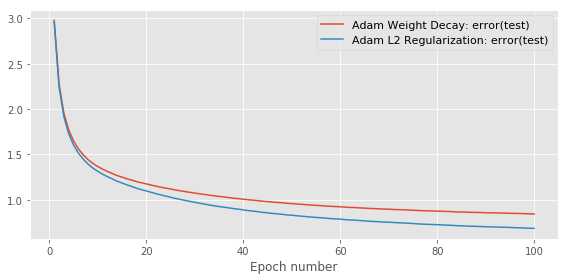

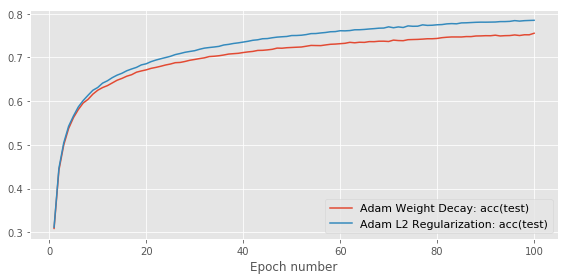

In [25]:
# Plot the change in the validation and training set error over training.
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in ['error(valid)']:
    ax_1.plot(np.arange(1, stats_1.shape[0]) * stats_interval, 
              stats_1[1:, keys_1[k]], label='Adam Weight Decay: error(test)')
    ax_1.plot(np.arange(1, stats_2.shape[0]) * stats_interval, 
              stats_2[1:, keys_2[k]], label='Adam L2 Regularization: error(test)')
#     ax_1.legend(loc=0)
ax_1.grid('on') # Turn axes grid on
ax_1.legend(loc='best', fontsize=11) # Add a legend
ax_1.set_xlabel('Epoch number')

fig_1.tight_layout() # This minimises whitespace around the axes.
fig_1.savefig('weight_decay_L2_err_test_models.pdf') # Save figure to current directory in PDF format

# Plot the change in the validation and training set accuracy over training.
fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)
for k in ['acc(valid)']:
    ax_2.plot(np.arange(1, stats_1.shape[0]) * stats_interval, 
              stats_1[1:, keys_1[k]], label='Adam Weight Decay: acc(test)')
    ax_2.plot(np.arange(1, stats_2.shape[0]) * stats_interval, 
              stats_2[1:, keys_2[k]], label='Adam L2 Regularization: acc(test)')
#     ax_2.legend(loc=0)
ax_2.grid('on') # Turn axes grid on
ax_2.legend(loc='best', fontsize=11) # Add a legend
ax_2.set_xlabel('Epoch number')

fig_2.tight_layout() # This minimises whitespace around the axes.
fig_2.savefig('weight_decay_L2_acc_test_models.pdf') # Save figure to current directory in PDF format


plt.show()

### Plot Graph: Adam weight decay vs. no restarts vs. warm restarts

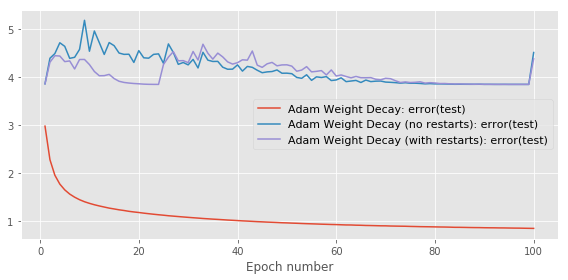

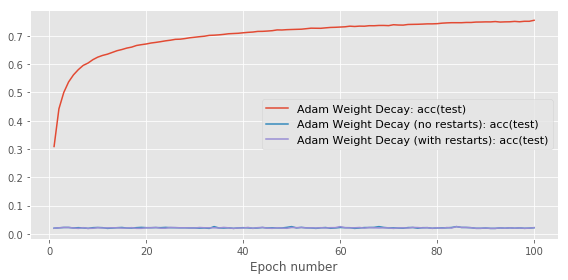

In [26]:
# Plot the change in the validation and training set error over training.
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in ['error(valid)']:
    ax_1.plot(np.arange(1, stats_1.shape[0]) * stats_interval, 
              stats_1[1:, keys_1[k]], label='Adam Weight Decay: error(test)')
    ax_1.plot(np.arange(1, stats_3.shape[0]) * stats_interval, 
              stats_3[1:, keys_3[k]], label='Adam Weight Decay (no restarts): error(test)')
    ax_1.plot(np.arange(1, stats_4.shape[0]) * stats_interval, 
              stats_4[1:, keys_4[k]], label='Adam Weight Decay (with restarts): error(test)')
#     ax_1.legend(loc=0)
ax_1.grid('on') # Turn axes grid on
ax_1.legend(loc='best', fontsize=11) # Add a legend
ax_1.set_xlabel('Epoch number')

fig_1.tight_layout() # This minimises whitespace around the axes.
fig_1.savefig('3vs_err_test_models.pdf') # Save figure to current directory in PDF format

# Plot the change in the validation and training set accuracy over training.
fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)
for k in ['acc(valid)']:
    ax_2.plot(np.arange(1, stats_1.shape[0]) * stats_interval, 
              stats_1[1:, keys_1[k]], label='Adam Weight Decay: acc(test)')
    ax_2.plot(np.arange(1, stats_3.shape[0]) * stats_interval, 
              stats_3[1:, keys_3[k]], label='Adam Weight Decay (no restarts): acc(test)')
    ax_2.plot(np.arange(1, stats_4.shape[0]) * stats_interval, 
              stats_4[1:, keys_4[k]], label='Adam Weight Decay (with restarts): acc(test)')
#     ax_2.legend(loc=0)
ax_2.grid('on') # Turn axes grid on
ax_2.legend(loc='best', fontsize=11) # Add a legend
ax_2.set_xlabel('Epoch number')

fig_2.tight_layout() # This minimises whitespace around the axes.
fig_2.savefig('3vs_acc_test_models.pdf') # Save figure to current directory in PDF format


plt.show()

In [ ]:
learning_rates = [0.000001, 0.0000015, 0.00001, 0.000015]  # scale for random parameter initialisation
decay_rates_1 = [0.99, 0,999]#[0.85, 0.9, 0.95]
decay_rates_2 = [0.999]#[0.95, 0.975, 0.999]

for i, element in enumerate(product(learning_rates, decay_rates_1, decay_rates_2)):
    print(i, element[0], element[1], element[2])

In [ ]:
import numpy as np
from itertools import product
a = np.linspace(0.1, 0.9, 5) #np.array([1, 2, 3, 4, 5 , 6])
b = [0.000001, 0.0000015, 0.00001, 0.000015, 0.0001, 0.00015] #np.array(['a', 'b', 'c'])

for i, element in enumerate(product(a, b)):
    print(i, element)